In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

%matplotlib inline

#total 93 missing features
#out of which 'provision_retail_space_modern_sqm','provision_retail_space_sqm' are most missing features in the whole data set
#state tell us about the conditon of the building
#train data file features  missing values are 51
#and remaining meta missing features are 42

In [70]:
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'provision_retail_space_modern_sqm', 'turnover_catering_per_cap',
       'theaters_viewers_per_1000_cap', 'seats_theather_rfmin_per_100000_cap',
       'museum_visitis_per_100_cap', 'bandwidth_sports',
       'population_reg_sports_share', 'students_reg_sports_share',
       'apartment_build', 'apartment_fund_sqm'],
      dtype='object', length=391)

In [75]:
mdf=df[['oil_urals','gdp_quart','gdp_quart_growth','cpi','ppi','gdp_deflator','balance_trade','balance_trade_growth','usdrub','eurrub','brent','gdp_annual','gdp_annual_growth','price_doc']]

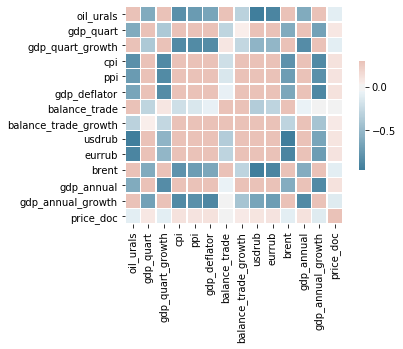

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mdf.corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [589]:
x=['oil_urals','gdp_quart','gdp_quart_growth','cpi','ppi','gdp_deflator','balance_trade','balance_trade_growth','usdrub','eurrub','brent','gdp_annual','gdp_annual_growth']
y='price_doc'
from scipy import stats
for i in mf.columns[1:]:
    print(i,":",stats.spearmanr(df[i],df[y])[0])

oil_urals : -0.12457022527032294
gdp_quart : 0.11093017729888487
gdp_quart_growth : -0.1317738808402033
cpi : 0.16829853202703746
ppi : 0.15337406247362295
gdp_deflator : 0.16958339899676464
balance_trade : 0.009903718156698627
balance_trade_growth : 0.08268244767421085
usdrub : 0.1680316693664656
eurrub : 0.1634175177424076
brent : -0.10735199319152053
net_capital_export : -0.00867815729193307
gdp_annual : 0.16958339899676464
gdp_annual_growth : -0.16958339899676464
average_provision_of_build_contract : 0.11248632235035608
average_provision_of_build_contract_moscow : 0.06653553971058189
rts : -0.15118146713933245
micex : 0.04545053123450357
micex_rgbi_tr : -0.15853462450184627
micex_cbi_tr : 0.14363914187935686
deposits_value : 0.16536671219383564
deposits_growth : -0.03245292209604624
deposits_rate : 0.03213318145990272
mortgage_value : 0.018958388926641593
mortgage_growth : -0.05810677886928097
mortgage_rate : 0.02894993515323096
grp : nan
grp_growth : nan
income_per_cap : 0.0431696

# before-preprocess modelling just filled values with 0


In [82]:
df_mf_train.fillna(0,axis=0)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,0.0,0.0,0.0,0.0,0.0,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30468,30471,2015-06-30,45,0.0,10.0,20.0,1.0,0.0,1.0,1.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,0.0,10805.0,0.0,0.45888,0.0,463938.0,0.00,0.00,0.0,234576.9


In [1360]:
def tot_encoding(df_mf_train):
    eco={'no data':1 ,'poor':2,'satisfactory':3,'good':4,'excellent':5}
    df_mf_train['ordinal_enco']=df_mf_train['ecology'].map(eco)
    sub_area_dic=(df.groupby('sub_area').size()/146).to_dict()
    #frequency_encoding
    df['sub_area_enco']=df['sub_area'].map(sub_area_dic)
    label_encoding={'no':0,'yes':1}
    df_mf_train ['culture_objects_top_25_enco']=df_mf_train ['culture_objects_top_25'].map(label_encoding)
    df_mf_train ['nuclear_reactor_raion_enco']=df_mf_train ['nuclear_reactor_raion'].map(label_encoding)
    df_mf_train ['detention_facility_raion_enco']=df_mf_train ['detention_facility_raion'].map(label_encoding)
    df_mf_train ['water_1line_enco']=df_mf_train ['water_1line'].map(label_encoding)
    df_mf_train ['railroad_1line_enco']=df_mf_train ['culture_objects_top_25'].map(label_encoding)
    df_mf_train ['big_road1_1line_enco']=df_mf_train ['big_road1_1line'].map(label_encoding)
    df_mf_train ['thermal_power_plant_raion_enco']=df_mf_train ['thermal_power_plant_raion'].map(label_encoding)
    df_mf_train ['incineration_raion_enco']=df_mf_train ['incineration_raion'].map(label_encoding)
    df_mf_train ['oil_chemistry_raion_enco']=df_mf_train ['oil_chemistry_raion'].map(label_encoding)
    df_mf_train ['radiation_raion_enco']=df_mf_train ['radiation_raion'].map(label_encoding)
    df_mf_train ['big_market_raion_enco']=df_mf_train ['big_market_raion'].map(label_encoding)
    df_mf_train ['railroad_terminal_raion_enco']=df_mf_train ['railroad_terminal_raion'].map(label_encoding)
    label_encodin={'Investment':2,'OwnerOccupier':3}
    df_mf_train ['producct_type_enco']=df_mf_train ['product_type'].map(label_encodin)
    ab=['product_type','ecology','sub_area','culture_objects_top_25','nuclear_reactor_raion','detention_facility_raion','water_1line','railroad_1line','big_road1_1line','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion']
    df_mf_train.drop(columns=ab,inplace=True)
    return df_mf_train

In [962]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,off_500persqm,trc_500persqm,off_1000persqm,trc_1000persqm,trc_1500persqm,trc_2000persqm,trc_3000persqm,off_3000persqm,trc_5000persqm,off_5000persqm
0,1,43,27.00,4.0,4.0,0.0,1976.0,2.0,8.0,0.0,...,0.000000,0.0,30500.000000,18533.333333,19046.666667,65520.578947,61704.521739,20962.833333,77627.230769,27840.862069
1,2,34,19.00,3.0,3.0,0.0,2013.5,2.0,6.0,0.0,...,0.000000,0.0,43300.000000,18813.000000,18152.142857,22383.125000,35111.785714,68498.833333,50873.550000,40764.621212
2,3,43,29.00,2.0,2.0,0.0,1969.0,2.0,5.0,0.0,...,0.000000,0.0,0.000000,0.000000,2600.000000,7507.142857,7507.142857,13857.000000,44942.571429,34375.813953
3,4,89,50.00,9.0,9.0,0.0,2003.0,2.0,8.0,0.0,...,0.000000,0.0,11000.000000,13463.333333,12784.571429,12784.571429,17146.333333,41750.000000,42826.363636,30520.750000
4,5,77,NaN,4.0,4.0,0.0,1964.0,2.0,7.0,0.0,...,19579.933333,45000.0,9151.130435,52733.333333,49544.444444,33226.058824,38281.166667,11216.088525,30728.578947,12198.293179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.00,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,0.000000,20985.0,0.000000,26656.666667,18205.000000,25554.071429,33869.545455,24128.411765,48080.981132,19059.113636
30467,30470,86,59.00,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,28069.428571,0.0,20419.428571,17818.000000,17298.571429,14507.700000,30191.857143,14076.682274,48287.944444,16126.163695
30468,30471,45,38.25,10.0,20.0,1.0,2015.0,1.0,1.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,11000.000000,11000.000000,0.000000,50325.000000,117300.000000
30469,30472,64,32.00,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,0.000000,0.0,0.000000,0.000000,28800.000000,13629.600000,19254.000000,31544.533333,32544.911111,31428.512821


In [148]:
df_test=tot_encoding(df_test)


In [ ]:
ab=['product_type','timestamp','ecology','sub_area','culture_objects_top_25','nuclear_reactor_raion','detention_facility_raion','water_1line','railroad_1line','big_road1_1line','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion']
df_mf_train.drop(columns=ab,inplace=True)

In [317]:
target=df_mf_train['price_doc']

In [87]:
df_mf_train.drop(columns='price_doc',inplace=True)

In [98]:
df_mf_train.loc[df_mf_train['child_on_acc_pre_school']=='#!','child_on_acc_pre_school']='7,311'
df_mf_train.loc[df_mf_train['child_on_acc_pre_school']=='7,311','child_on_acc_pre_school']=7311
df_mf_train.loc[df_mf_train['child_on_acc_pre_school']=='3,013','child_on_acc_pre_school']=3013
df_mf_train.loc[df_mf_train['child_on_acc_pre_school']=='16,765','child_on_acc_pre_school']=16765 

df_mf_train['child_on_acc_pre_school'].fillna(0, inplace=True)


In [96]:

df_mf_train.loc[df_mf_train['modern_education_share']=='93,08','modern_education_share']=9308
df_mf_train.loc[df_mf_train['modern_education_share']=='90,92','modern_education_share']=9092
df_mf_train.loc[df_mf_train['modern_education_share']=='95,4918','modern_education_share']=954918

df_mf_train['modern_education_share'].fillna(0, inplace=True)



df_mf_train.loc[df_mf_train['old_education_build_share']=='25,47','old_education_build_share']=2547
df_mf_train.loc[df_mf_train['old_education_build_share']=='23,14','old_education_build_share']=2314
df_mf_train.loc[df_mf_train['old_education_build_share']=='8,2517','old_education_build_share']=82517 

df_mf_train['old_education_build_share'].fillna(0, inplace=True)

In [99]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(eval_metric='rmsle')
clf = GridSearchCV(xgb_model,
                   {'learning_rate': [0.05, 0.1, 0.15],
                    'max_depth': [6,10],
                    'n_estimators': [100,200,250]}, verbose=1)
clf.fit(df_mf_train, target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 144.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, eval_metric='rmsle',
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_co...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [166]:
df_train=df_mf_train[:24500]
y_train=target[:24500]
df_test=df_mf_train[24500:]
y_test=target[24500:]

In [102]:
clf.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 250}

In [169]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.05, max_depth= 6, n_estimators=250,eval_metric='rmsle')
xgb_model.fit(df_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
print("TRAIN RMSLE")
predictions=xgb_model.predict(df_train)
#RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, predictions))

TRAIN RMSLE


0.4260246056983034

In [1074]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error([50000]*100,[35000]*100))

0.3566663727183191

In [171]:
print("TRAIN RMSLE")
predictions=xgb_model.predict(df_train)
#RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, predictions))
print("test RMSLE")
predictions=xgb_model.predict(df_test)
#RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, predictions))

test RMSLE


0.4119323139039775

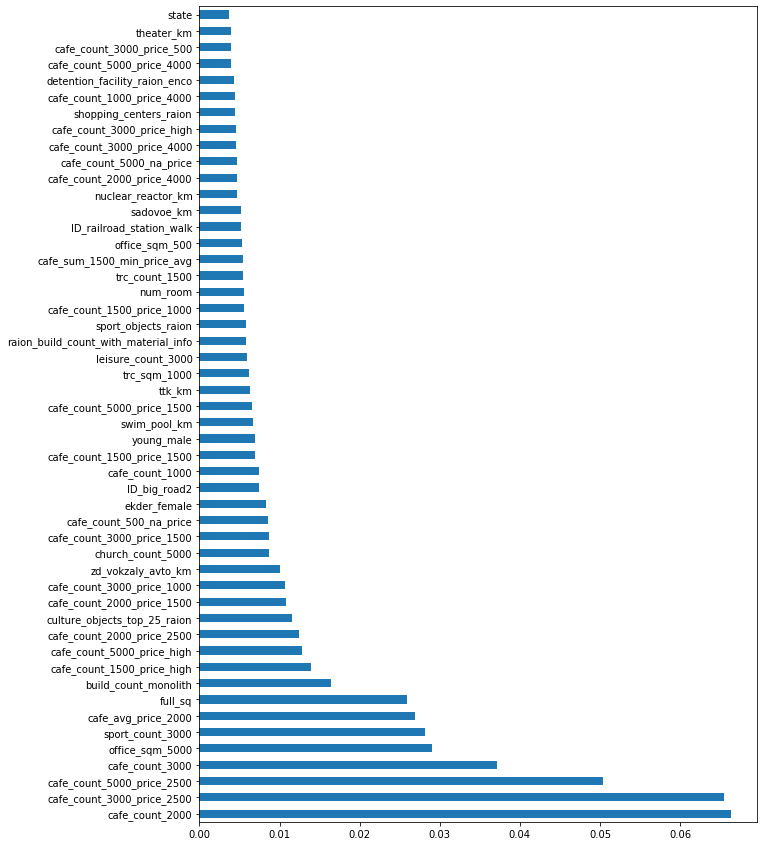

In [107]:

feat_importances = pd.Series(xgb_model.feature_importances_, index=df_mf_train.columns)
plt.figure(figsize=(10,15))

feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [49]:
test_df_mf['build_year'].isna().sum()

1049

In [59]:
for i in df_mf_train.groupby(['sub_area'])['build_year'].transform('median'):
    print(i)


1976.0
1987.0
1969.0
1999.0
1964.0
1964.0
1964.0
1976.0
1967.0
1980.0
2006.0
1998.0
1980.0
1965.0
1969.0
1995.0
1964.0
2003.0
2006.0
1970.0
1972.0
1973.0
1969.0
1973.0
1973.0
1967.0
1978.0
1989.0
1967.0
1974.0
1982.0
1976.0
1976.0
1989.0
1975.0
1995.0
1981.0
1968.0
1971.0
1971.0
1962.0
1968.0
1967.0
1971.0
1986.0
1999.0
1963.0
1989.0
1974.0
1998.0
1968.0
1982.0
1969.0
1969.5
1981.0
1968.0
1967.0
2001.0
1962.5
1973.0
2005.0
1972.0
1967.0
1968.0
1969.5
1979.0
1982.0
1969.5
1966.0
1975.0
1976.0
1971.0
1978.0
1976.0
1969.5
1982.0
1977.0
1964.0
1974.0
1972.0
1970.0
2001.0
1976.0
1964.0
2001.0
1971.0
1967.0
1975.0
1970.0
1971.0
2002.0
1988.0
1989.0
1992.0
1978.0
1960.0
1973.0
1989.0
1987.0
1975.0
1969.0
1958.0
1976.0
1979.0
1966.0
1967.0
1978.5
1998.0
1972.0
1976.0
1973.0
1967.0
1992.0
1969.0
1970.0
1976.0
1978.0
1989.0
1972.0
1970.0
1982.0
1978.5
1986.0
1971.0
1960.0
1967.0
1969.5
1975.0
1973.0
1969.0
1969.0
1973.0
1978.0
2002.0
1971.0
1969.0
1991.0
1967.0
1978.0
1971.0
1976.0
1975.0
1979.0

1970.0
1988.0
1964.0
1971.0
2003.0
1971.0
1970.0
1989.0
2014.0
1969.0
2002.0
1987.0
2002.0
1979.0
1989.0
1995.0
1966.0
1966.0
1970.0
1987.0
1978.0
1971.0
1982.0
1966.0
1978.0
2013.0
1976.0
1963.0
1967.0
1967.0
1981.0
1974.0
1962.0
1975.0
1969.0
2001.0
1989.0
1973.0
1963.0
1963.0
1998.0
1969.0
1979.0
1961.0
1982.0
1978.0
1975.0
1964.0
1969.5
1958.0
1961.0
1995.0
1964.0
1978.0
1976.0
1982.0
1982.0
1974.0
1978.0
1972.0
1979.0
1967.0
2002.0
1970.0
2014.0
1983.0
1973.0
1966.0
1991.0
1976.0
1975.0
1971.0
1963.0
1989.0
1965.0
1966.0
1979.0
1989.0
1991.0
1970.0
1964.0
1992.0
1992.0
1965.0
1979.0
1987.0
1966.0
1989.0
1958.0
1970.0
1987.0
2002.0
1978.5
1979.0
1971.0
1962.0
1962.5
1964.0
1989.0
1972.0
2002.0
1966.0
1982.0
1965.0
1966.0
1989.0
1973.0
1995.0
1969.5
1970.0
1967.0
1966.0
1960.0
1978.5
1978.0
1976.0
1961.0
1970.0
1966.0
1987.0
1973.0
1977.0
1965.0
1974.0
1964.0
1983.0
2006.0
1968.0
1976.0
1963.0
1970.0
1981.0
1967.0
2013.0
1992.0
1974.0
1974.0
2007.0
1978.0
1995.0
1976.0
1986.0
1964.0

2002.0
2014.0
2014.0
1973.0
1992.0
1995.0
1972.0
2014.0
1969.5
2014.0
2014.0
2014.0
1992.0
1976.0
1964.0
1985.0
2011.0
1967.0
1969.0
1988.0
1983.0
2014.0
2014.0
1992.0
1981.0
1975.0
1969.0
2011.0
2014.0
1978.0
2014.0
1979.0
1968.0
1962.0
2011.0
2014.0
1992.0
1995.0
1987.0
2014.0
2014.0
1968.0
2014.0
1986.0
1971.0
1970.0
2014.0
1970.0
2007.0
1992.0
1974.0
1974.0
1961.0
2014.0
1998.0
1999.0
2014.0
2014.0
2014.0
1969.0
2013.0
2014.0
2011.0
2014.0
1998.0
1971.0
2014.0
2014.0
2014.0
1978.0
1969.0
2014.0
1969.0
1999.0
1964.0
1999.0
2014.0
2014.0
2013.0
2013.0
2014.0
2014.0
1978.0
2011.0
2013.0
1992.0
2014.0
2014.0
2014.0
1987.0
2011.0
1975.0
2011.0
1969.0
1989.0
1980.0
1986.0
2014.0
2014.0
1969.0
2010.0
2013.0
1982.0
2014.0
2014.0
1966.0
1967.0
2014.0
1964.0
2011.0
1999.0
2014.0
2011.0
2014.0
1971.0
1992.0
2014.0
1981.0
2011.0
2011.0
2011.0
2014.0
1991.0
2013.0
1967.0
2013.0
1966.0
2011.0
2006.0
1965.0
1964.0
2013.0
2011.0
1973.0
2014.0
2014.0
1998.0
2014.0
1966.0
1998.0
2011.0
2014.0
1970.0

2014.0
2014.0
2014.0
2011.0
2014.0
1978.5
1979.0
1999.0
2013.0
1976.0
1965.0
2014.0
1966.0
2014.0
1978.0
2014.0
1965.0
2014.0
1976.0
2014.0
2014.0
1966.0
2014.0
2014.0
2011.0
1969.0
1963.0
2014.0
2003.0
1969.5
2014.0
2003.0
1961.0
1992.0
2014.0
1972.0
2007.0
2014.0
1971.0
1967.0
2014.0
2011.0
1977.0
2014.0
1969.0
1981.0
2014.0
1978.0
2014.0
2006.0
1980.5
2014.0
1977.0
2014.0
1978.0
1973.0
1964.0
2011.0
1987.0
2014.0
2014.0
1999.0
1995.0
2014.0
2014.0
1962.0
2003.0
1968.0
2014.0
1971.0
1966.0
1961.0
2014.0
1995.0
2014.0
1969.0
1971.0
1967.0
1970.0
2014.0
2002.0
2013.0
1969.0
2014.0
2014.0
2003.0
2014.0
2014.0
2014.0
2014.0
1973.0
1995.0
2014.0
1972.0
1973.0
2014.0
1973.0
2014.0
1973.0
1967.0
2014.0
1979.0
2014.0
1973.0
1963.0
1973.0
1978.0
2014.0
1973.0
1964.0
1999.0
2014.0
1961.0
1998.0
1995.0
1987.0
1970.0
1992.0
1968.0
1966.0
2014.0
2014.0
2014.0
2014.0
1972.0
1968.0
1971.0
2014.0
1971.0
1999.0
2014.0
1970.0
2010.0
1978.0
1992.0
1973.0
1999.0
1973.0
2007.0
2014.0
1999.0
1965.0
1971.0

2014.0
1969.0
2014.0
2014.0
1971.0
1976.0
2014.0
2011.0
2014.0
1986.0
1973.0
2014.0
2014.0
2014.0
2014.0
1999.0
2014.0
1960.0
2014.0
2014.0
2014.0
2003.0
2014.0
2014.0
1992.0
2014.0
2014.0
1986.0
2011.0
2014.0
1970.0
1989.0
2014.0
1999.0
1969.0
1981.0
2014.0
2011.0
2014.0
1999.0
2014.0
1989.0
1999.0
2014.0
2014.0
1992.0
1974.0
1968.0
1992.0
2014.0
2014.0
1975.0
1979.0
1971.0
2014.0
2014.0
2014.0
1999.0
2014.0
2001.0
1964.0
2011.0
2014.0
2014.0
2014.0
2014.0
2014.0
1967.0
1972.0
2014.0
2011.0
2011.0
2011.0
2014.0
1998.0
2014.0
2011.0
1992.0
2014.0
1975.0
2011.0
2011.0
2011.0
2011.0
1966.0
2014.0
2013.0
2014.0
2011.0
1978.0
1971.0
1969.0
1992.0
1972.0
1961.0
2014.0
1978.5
1978.0
1965.0
1998.0
2002.0
1969.0
1971.0
1986.0
1999.0
2014.0
2014.0
1971.0
2014.0
2014.0
2014.0
1972.0
1965.0
2014.0
2014.0
1992.0
1978.0
1995.0
2014.0
2014.0
2011.0
1999.0
2004.0
1973.0
2011.0
1999.0
1981.0
2002.0
1976.0
2014.0
2004.0
2014.0
1976.0
2014.0
1992.0
1970.0
1988.0
1966.0
1978.0
2011.0
2002.0
1999.0
2014.0

2014.0
1987.0
1998.0
2014.0
1965.0
2013.0
2011.0
2013.0
1979.0
1974.0
1971.0
1978.0
1999.0
2014.0
1979.0
2010.0
2014.0
1967.0
1969.0
2014.0
1987.0
1975.0
2014.0
2010.0
1976.0
1964.0
1971.0
2014.0
2006.0
2014.0
1971.0
1978.0
1989.0
2014.0
2014.0
1987.0
1971.0
1971.0
2014.0
1970.0
2014.0
2014.0
2014.0
2003.0
1966.0
1973.0
1976.0
1967.0
1973.0
1999.0
2014.0
1999.0
2014.0
1999.0
1969.0
2014.0
1973.0
1999.0
1975.0
1972.0
2010.0
2011.0
2014.0
2014.0
1971.0
1978.0
1964.0
1964.0
1972.0
2014.0
1969.0
1971.0
1976.0
1972.0
2014.0
2014.0
1968.0
2011.0
1976.0
1987.0
1969.0
2014.0
2014.0
2014.0
1980.0
2014.0
2014.0
2014.0
1977.0
1977.0
2014.0
2014.0
2011.0
1960.0
2014.0
2014.0
1989.0
1971.0
1976.0
1963.0
2014.0
1971.0
1963.0
2014.0
2014.0
1987.0
2004.0
1988.0
1966.0
1964.0
1981.0
2014.0
1999.0
1970.0
1998.0
1981.0
2014.0
2001.0
2005.0
2014.0
1967.0
2014.0
2011.0
2014.0
1971.0
2002.0
1973.0
1999.0
1979.0
2014.0
1982.0
2014.0
1969.0
1964.0
1962.0
1972.0
1970.0
1978.5
1995.0
2014.0
1966.0
2014.0
1995.0

1975.0
1998.0
1992.0
1982.0
1987.0
2001.0
2014.0
1972.0
1980.0
2014.0
1965.0
1998.0
1982.0
2014.0
1980.0
1971.0
2014.0
2003.0
2014.0
1971.0
2014.0
1982.0
2011.0
1976.0
1958.0
1962.0
1971.0
1973.0
1969.0
1987.0
2002.0
1992.0
1971.0
1977.0
1976.0
1986.0
2013.0
1999.0
1975.0
1963.0
2014.0
1979.0
1975.0
1982.0
1995.0
1970.0
2007.0
1970.0
2011.0
1964.0
2002.0
1974.0
2001.0
1964.0
1982.0
2003.0
1968.0
2014.0
1967.0
2013.0
1982.0
1976.0
2001.0
1980.0
1969.0
1967.0
1973.0
1971.0
2002.0
2013.0
1964.0
1992.0
2014.0
2014.0
1975.0
2011.0
1986.0
1992.0
1965.0
2011.0
2014.0
1974.0
1958.0
2011.0
2014.0
2014.0
2014.0
1964.0
1969.5
1981.0
1995.5
2013.0
1975.0
1991.0
1965.0
1973.0
1976.0
1992.0
1987.0
2014.0
1968.0
1981.0
1995.0
1979.0
2014.0
1976.0
2014.0
1988.0
1979.0
1960.0
1969.0
2014.0
1965.0
2014.0
2014.0
1992.0
1968.0
1974.0
2011.0
1967.0
2014.0
1964.0
2014.0
2014.0
1963.0
1968.0
2014.0
1962.0
1982.0
2001.0
1995.0
2014.0
2011.0
1992.0
1977.0
2014.0
2014.0
1992.0
1963.0
1963.0
2011.0
1971.0
1978.0

2014.0
1973.0
2014.0
2014.0
2014.0
1971.0
2014.0
2003.0
1967.0
1989.0
1971.0
2014.0
2011.0
1972.0
1971.0
1971.0
1973.0
1976.0
2014.0
1971.0
1977.0
1998.0
1973.0
2014.0
2014.0
1969.0
1973.0
2011.0
1966.0
1995.0
1992.0
1971.0
2014.0
1974.0
1974.0
1971.0
1972.0
1964.0
1999.0
1970.0
1982.0
1973.0
1961.0
1992.0
1969.0
1992.0
1973.0
1971.0
1970.0
2002.0
2014.0
1999.0
1977.0
1989.0
1965.0
2014.0
1963.0
1974.0
1986.0
2011.0
2010.0
1966.0
1976.0
1971.0
1986.0
1986.0
1967.0
1986.0
1977.0
1989.0
1986.0
2002.0
2011.0
1991.0
2014.0
2013.0
1966.0
1975.0
2011.0
2011.0
1995.5
1978.0
2011.0
1971.0
1982.0
1992.0
1987.0
2014.0
1976.0
2003.0
1982.0
1981.0
2011.0
1972.0
2011.0
1970.0
2001.0
1972.0
1970.0
1967.0
1969.0
2011.0
1965.0
1971.0
1987.0
1962.5
1967.0
1975.0
1992.0
1965.0
2001.0
1992.0
2014.0
2014.0
2003.0
1999.0
1970.0
2013.0
1976.0
2014.0
1965.0
2011.0
1971.0
1967.0
1992.0
1972.0
1983.0
1969.0
1992.0
1962.0
2013.0
2014.0
1992.0
2014.0
2014.0
1981.0
1971.0
1976.0
2001.0
1974.0
1998.0
1986.0
1963.0

1982.0
1982.0
1974.0
1971.0
1972.0
1999.0
1979.0
2007.0
1965.0
1975.0
1987.0
1965.0
2013.0
1963.0
1971.0
1974.0
1961.0
1986.0
2007.0
2014.0
1962.0
1973.0
2011.0
1982.0
1987.0
2014.0
1987.0
1971.0
2011.0
1976.0
1967.0
2001.0
2001.0
2014.0
1971.0
1972.0
2011.0
1963.0
1978.5
1974.0
2014.0
1979.0
1970.0
2014.0
1976.0
2006.0
1970.0
1992.0
1971.0
1979.0
1963.0
1964.0
1992.0
1972.0
2014.0
2014.0
2002.0
1974.0
1971.0
2013.0
2014.0
1989.0
1962.0
2011.0
2013.0
1978.5
1974.0
2014.0
2014.0
1965.0
2013.0
1971.0
1976.0
1971.0
2014.0
2014.0
2013.0
1975.0
2013.0
1987.0
1995.0
1971.0
2014.0
2001.0
1971.0
2011.0
1981.0
2014.0
1973.0
1980.5
1963.0
1998.0
1965.0
1961.0
1960.5
2014.0
1978.0
1983.0
1964.0
1975.0
1987.0
1970.0
2014.0
2004.0
2011.0
2014.0
1995.5
2011.0
2014.0
1969.0
1962.5
1973.0
1976.0
1964.0
1971.0
2014.0
2014.0
2014.0
1966.0
1963.0
1971.0
2014.0
2007.0
2001.0
2007.0
1982.0
1971.0
1961.0
2004.0
2004.0
1987.0
2001.0
2014.0
2004.0
1998.0
2011.0
1965.0
2014.0
1970.0
1975.0
1960.0
1969.5
1963.0

1966.0
1995.5
1992.0
1974.0
2004.0
1992.0
1971.0
1978.0
2014.0
2011.0
1995.0
1934.0
1978.0
2014.0
1995.0
1971.0
1985.0
2001.0
2010.0
1972.0
1965.0
1978.0
1976.0
1992.0
2014.0
2014.0
1969.0
1964.0
1989.0
1965.0
1979.0
1972.0
1978.0
1999.0
1967.0
1967.0
2010.0
1967.0
1969.0
1978.0
1964.0
1981.0
1967.0
2011.0
2006.0
2014.0
1972.0
1971.0
1978.0
2014.0
1972.0
1976.0
2013.0
1989.0
1971.0
1982.0
1965.0
1983.0
1983.0
2014.0
1967.0
1998.0
2013.0
1987.0
1992.0
1969.0
1978.0
1961.0
2011.0
1966.0
2014.0
2011.0
1972.0
1982.0
1986.0
1978.0
1973.0
1995.5
2011.0
2014.0
2014.0
2014.0
2014.0
1978.0
1973.0
1978.0
2004.0
2014.0
2014.0
1962.0
1967.0
1973.0
1970.0
1974.0
1985.0
2011.0
2014.0
2014.0
1976.0
2014.0
1985.0
1969.0
2014.0
1962.0
1987.0
1992.0
1968.0
2014.0
2014.0
1976.0
2014.0
1995.0
1971.0
1978.0
2002.0
2014.0
1973.0
1966.0
1967.0
1963.0
1971.0
2011.0
2014.0
2014.0
1976.0
2011.0
1973.0
1967.0
2014.0
1961.0
2014.0
1972.0
2004.0
1992.0
1963.0
1967.0
1995.0
2011.0
1987.0
2014.0
2014.0
1987.0
1962.0

1992.0
1976.0
1973.0
2011.0
1989.0
2013.0
1987.0
1978.0
1969.0
1969.0
2011.0
2014.0
1998.0
1960.0
1992.0
1987.0
1988.0
1964.0
1971.0
1975.0
1971.0
2010.0
1963.0
2014.0
1973.0
2014.0
1969.0
2014.0
2011.0
1975.0
1992.0
1992.0
1965.0
2014.0
1962.0
1962.0
1973.0
1992.0
1986.0
1980.0
1977.0
1967.0
1972.0
2011.0
1969.0
1963.0
1992.0
1983.0
2014.0
1970.0
2001.0
1967.0
1965.0
1963.0
1999.0
1964.0
1969.0
2014.0
1992.0
2014.0
1969.0
1983.0
2003.0
1981.0
1999.0
1962.0
1978.0
2014.0
1970.0
2014.0
1977.0
2014.0
1970.0
2011.0
1987.0
2011.0
1961.0
1967.0
1987.0
2014.0
1970.0
2013.0
1973.0
2014.0
1992.0
2011.0
2011.0
2014.0
1992.0
2001.0
2014.0
1971.0
2013.0
1992.0
2014.0
2001.0
1970.0
2014.0
1980.0
1999.0
2004.0
1958.0
1963.0
1972.0
1988.0
2014.0
1964.0
1967.0
2013.0
2013.0
1965.0
2014.0
1970.0
2014.0
1981.0
2011.0
1966.0
1966.0
2014.0
2011.0
2011.0
2011.0
1972.0
2001.0
1995.0
2014.0
1977.0
1971.0
1992.0
1980.0
1971.0
1973.0
1965.0
1968.0
1964.0
1983.0
1995.0
1963.0
1966.0
1983.0
1965.0
2014.0
2011.0

2013.0
2011.0
1965.0
1971.0
2002.0
1965.0
2013.0
2003.0
1963.0
1967.0
1973.0
1995.0
1973.0
1988.0
1975.0
1982.0
1978.5
1969.0
2011.0
2014.0
1982.0
2014.0
1973.0
1960.0
2006.0
1995.0
1999.0
1973.0
1971.0
2011.0
1975.0
1976.0
1982.0
1992.0
1966.0
1987.0
2011.0
1992.0
1999.0
1983.0
1971.0
1969.0
1986.0
1998.0
1966.0
2014.0
1976.0
2014.0
1963.0
1999.0
1974.0
1977.0
1972.0
1968.0
1992.0
2011.0
1964.0
2014.0
2011.0
1963.0
1999.0
1974.0
1962.0
2014.0
1967.0
2014.0
1977.0
1970.0
2014.0
1963.0
1992.0
2014.0
1964.0
1964.0
2011.0
2011.0
1973.0
1983.0
1969.0
1998.0
1971.0
2014.0
1999.0
1998.0
1989.0
1978.0
1977.0
2001.0
2014.0
2013.0
2014.0
1978.0
2014.0
1963.0
2011.0
2014.0
1966.0
2013.0
1973.0
1969.0
2014.0
1968.0
1978.0
1973.0
1965.0
1964.0
1964.0
1992.0
1977.0
2002.0
1998.0
1979.0
1964.0
2005.0
1968.0
1992.0
1963.0
1968.0
2013.0
1998.0
2014.0
2011.0
1986.0
2014.0
1978.0
1962.0
2014.0
1999.0
2002.0
2014.0
2011.0
2014.0
1970.0
1972.0
2014.0
1992.0
2011.0
2014.0
2013.0
1969.0
2014.0
1968.0
1964.0

2014.0
1973.0
2003.0
1966.0
1988.0
2001.0
1964.0
2014.0
1971.0
1977.0
1974.0
1962.0
1987.0
1969.0
1965.0
1979.0
2011.0
2014.0
1973.0
2001.0
1970.0
1967.0
1974.0
1992.0
2011.0
2014.0
1966.0
2014.0
1992.0
1964.0
2011.0
1978.0
1995.0
1977.0
1966.0
2014.0
2006.0
2011.0
2014.0
2011.0
1973.0
2014.0
1982.0
1963.0
2014.0
2003.0
1976.0
2013.0
2001.0
2011.0
1977.0
2014.0
1973.0
2013.0
1978.0
1987.0
2001.0
2014.0
2011.0
1972.0
1982.0
1982.0
2014.0
1968.0
2001.0
1987.0
2013.0
1969.0
1968.0
1972.0
1970.0
1970.0
2013.0
1978.0
1978.5
1987.0
1986.0
1978.0
1969.0
2014.0
1973.0
1999.0
1981.0
1969.0
1961.0
1971.0
1988.0
1972.0
2007.0
1986.0
2014.0
1986.0
1999.0
2003.0
2014.0
1966.0
2014.0
2003.0
1963.0
2011.0
2011.0
1979.0
1986.0
2011.0
2011.0
1995.0
1995.0
1975.0
1992.0
2014.0
2014.0
1979.0
2014.0
2014.0
1992.0
1987.0
1975.0
2003.0
1982.0
1987.0
1971.0
2014.0
2011.0
1992.0
1986.0
2011.0
1970.0
2014.0
1969.0
2011.0
2011.0
2011.0
1969.0
2011.0
2014.0
2014.0
2011.0
2011.0
1973.0
2014.0
1964.0
2011.0
2011.0

1973.0
1986.0
1987.0
1964.0
2014.0
2014.0
1992.0
2014.0
2011.0
1972.0
1969.0
1995.0
1969.0
2013.0
2014.0
1981.0
2011.0
1985.0
2011.0
1963.0
2014.0
1961.0
2011.0
1972.0
1992.0
1991.0
1987.0
1992.0
2014.0
2014.0
1962.0
2013.0
1970.0
2006.0
1963.0
2014.0
1970.0
2014.0
1992.0
1979.0
1967.0
2013.0
2014.0
2014.0
1962.0
1966.0
2014.0
1972.0
2014.0
2014.0
1974.0
1967.0
2014.0
1995.0
1971.0
1978.0
1969.5
1974.0
1970.0
1972.0
1983.0
1965.0
1995.0
1964.0
2014.0
2014.0
1983.0
2014.0
2014.0
1978.0
1958.0
2011.0
1967.0
2014.0
1969.0
1967.0
2011.0
1981.0
1982.0
1976.0
1965.0
1992.0
1972.0
1983.0
1969.0
2014.0
2014.0
1992.0
1987.0
1973.0
1982.0
2014.0
2014.0
1976.0
1972.0
1978.5
1971.0
1978.0
1972.0
1969.0
1989.0
1979.0
2011.0
2014.0
2011.0
1965.0
1999.0
1964.0
1971.0
2003.0
1992.0
2014.0
1999.0
2011.0
1983.0
2014.0
1986.0
2011.0
2010.0
1964.0
2011.0
2007.0
1986.0
2014.0
1992.0
2003.0
2013.0
2013.0
1969.0
1992.0
1971.0
2014.0
2014.0
2004.0
1972.0
1965.0
2003.0
1971.0
2001.0
2002.0
2013.0
2013.0
1968.0

1962.5
2011.0
1967.0
2014.0
1962.0
1973.0
1962.0
1979.0
1971.0
1971.0
1986.0
2014.0
1991.0
2014.0
1973.0
2007.0
2014.0
2011.0
2014.0
2014.0
2014.0
1967.0
1969.5
1988.0
2011.0
1995.0
2011.0
2014.0
1973.0
1971.0
1976.0
2014.0
1977.0
2014.0
2014.0
1969.0
2011.0
1987.0
2011.0
1977.0
2014.0
1999.0
1975.0
1992.0
1998.0
1961.0
2011.0
1971.0
1965.0
1995.5
2013.0
2011.0
2014.0
2003.0
2003.0
2001.0
1976.0
1964.0
1998.0
2014.0
2011.0
2013.0
2003.0
2014.0
2014.0
1977.0
2003.0
2007.0
2011.0
2014.0
1992.0
2014.0
2014.0
1992.0
2014.0
2001.0
2014.0
2011.0
1971.0
1973.0
2003.0
2014.0
1963.0
2014.0
1972.0
2011.0
2014.0
2011.0
2014.0
1989.0
2014.0
2011.0
1971.0
1988.0
1964.0
1964.0
2014.0
2011.0
2003.0
2011.0
2011.0
1992.0
1971.0
1969.0
2011.0
1982.0
2014.0
1976.0
2011.0
1973.0
2014.0
1967.0
1988.0
2011.0
1974.0
2014.0
1979.0
2014.0
1970.0
1969.5
1986.0
2011.0
2011.0
2013.0
2011.0
1999.0
2011.0
2011.0
1982.0
2014.0
2011.0
1989.0
2014.0
1987.0
2011.0
2014.0
2014.0
1965.0
2014.0
2011.0
2011.0
2014.0
2003.0

In [80]:
df_mf_train[['build_year','sub_area']].tail()

,build_year,sub_area
30466,1975.0,Otradnoe
30467,1935.0,Tverskoe
30468,NaN,Poselenie Vnukovskoe
30469,2003.0,Obruchevskoe
30470,1968.0,Novogireevo


In [92]:
a=df.groupby(['sub_area'])['build_year'].transform('median').round()
b=df['sub_area']
c=dict(zip(b,a))
df_mf_train[['sub_area','build_year']].isna().map(c)

AttributeError: 'DataFrame' object has no attribute 'map'

In [97]:
df_mf_train['sub_area'].notna()

0        True
1        True
2        True
3        True
4        True
         ... 
30466    True
30467    True
30468    True
30469    True
30470    True
Name: sub_area, Length: 30471, dtype: bool

In [94]:
train.loc[(train['build_year'].isna()) & (train['sub_area']==i),'build_year']=train.loc[(train['build_year'].notna()) & (train['sub_area']==i),'build_year'].median()


NameError: name 'train' is not defined

In [79]:
s=df_mf_train.loc[df_mf_train['sub_area']=='Poselenie Vnukovskoe','build_year']
s.median()

2011.0

In [65]:
for key,val in dict(zip(df_mf_train['sub_area'],df_mf_train['build_year'])).items():
    print(key,val)

Bibirevo 1982.0
Nagatinskij Zaton nan
Tekstil'shhiki 1987.0
Mitino 1992.0
Basmannoe 1914.0
Nizhegorodskoe 1960.0
Sokol'niki 1958.0
Koptevo 2002.0
Kuncevo 2008.0
Kosino-Uhtomskoe 2005.0
Zapadnoe Degunino nan
Presnenskoe 1931.0
Lefortovo 1988.0
Mar'ino 1994.0
Kuz'minki 2006.0
Nagornoe 2015.0
Gol'janovo 1977.0
Vnukovo 1996.0
Juzhnoe Tushino 1962.0
Severnoe Tushino 2001.0
Chertanovo Central'noe 1970.0
Fili Davydkovo 1974.0
Otradnoe 1975.0
Novo-Peredelkino 1989.0
Bogorodskoe 1972.0
Jaroslavskoe 1979.0
Strogino 1979.0
Hovrino 1968.0
Moskvorech'e-Saburovo 1998.0
Staroe Krjukovo 2004.0
Ljublino 2007.0
Caricyno 1997.0
Veshnjaki 1971.0
Danilovskoe nan
Preobrazhenskoe 1967.0
Kon'kovo 2014.0
Brateevo 1997.0
Vostochnoe Izmajlovo 1963.0
Vyhino-Zhulebino 1968.0
Donskoe 2006.0
Novogireevo 1968.0
Juzhnoe Butovo 2015.0
Sokol 1967.0
Kurkino 2003.0
Izmajlovo nan
Severnoe Medvedkovo 1976.0
Rostokino 1957.0
Orehovo-Borisovo Severnoe 1977.0
Ochakovo-Matveevskoe 2006.0
Taganskoe 1958.0
Dmitrovskoe 1967.0
Oreh

In [ ]:
dict(zip(df_mf_train['build_year'],df_mf_train['sub_area']))

In [ ]:
    df_test['ID_railroad_station_walk'].fillna(df_train.groupby(['sub_area'])['ID_railroad_station_walk'].transform('median'), inplace=True)
    df_test['railroad_station_walk_min'].fillna(df_train.groupby(['sub_area'])['railroad_station_walk_min'].transform('median'), inplace=True)
    df_test['railroad_station_walk_km'].fillna(df_train.groupby(['sub_area'])['railroad_station_walk_km'].transform('median'), inplace=True)
    df_test['metro_km_walk'].fillna(df_train.groupby(['sub_area'])['metro_km_walk'].transform('median'), inplace=True)
    df_test['metro_min_walk'].fillna(df_train.groupby(['sub_area'])['metro_min_walk'].transform('median'), inplace=True)
    

# pre_processing 

In [20]:
#one_preprocessing
def preprocess(df_train,df_test):
    sub_area_uq=df_train.sub_area.unique()
    df_test.loc[df_test.full_sq == 5326.0, 'full_sq'] = 53
    df_test.loc[df_test.full_sq == 729.0, 'full_sq'] = 72
    df_test.loc[df_test['max_floor'].isna(),'max_floor']=1
    df_test.loc[df_test['max_floor']-df_test['floor']<0,'max_floor']=df_test.loc[df_test['max_floor']-df_test['floor']<0,'floor']   
    df_test.loc[df_test['floor'].isna(),'floor']=1
    
    #df_test['life_sq'].fillna(df_train.groupby(['sub_area'])['life_sq'].transform('median'), inplace=True)
    #df_test['kitch_sq'].fillna(df_train.groupby(['sub_area'])['kitch_sq'].transform('median'), inplace=True)
    
    for i in sub_area_uq:
        df_train.loc[(df_train['life_sq'].isna()) & (df_train['sub_area']==i),'life_sq']=df_train.loc[(df_train['life_sq'].notna()) & (df_train['sub_area']==i),'life_sq'].median()
    
    #for test_life_sq
    for i in sub_area_uq:
        df_test.loc[(df_test['life_sq'].isna()) & (df_test['sub_area']==i),'life_sq']=df_train.loc[(df_train['life_sq'].notna()) & (df_train['sub_area']==i),'life_sq'].median()

     #for train_kitch_sq
    for i in sub_area_uq:
        df_train.loc[(df_train['kitch_sq'].isna()) & (df_train['sub_area']==i),'kitch_sq']=df_train.loc[(df_train['kitch_sq'].notna()) & (df_train['sub_area']==i),'kitch_sq'].median()
    
    #for test_kitch
    for i in sub_area_uq:
        df_test.loc[(df_test['kitch_sq'].isna()) & (df_test['sub_area']==i),'kitch_sq']=df_train.loc[(df_train['kitch_sq'].notna()) & (df_train['sub_area']==i),'kitch_sq'].median()

    
    
    

    #added two extra sq features
    lif_prp=df_train.groupby(['sub_area'])['life_sq'].median()/df_train.groupby(['sub_area'])['full_sq'].median()
    life_prop=dict(lif_prp)
    df_test['lifprp_subar']=0*len(df_test)
    for k,v in life_prop.items():    
        df_test.loc[df_test['sub_area']==k,'lifprp_subar']=v
    
    kitch_prp=df_train.groupby(['sub_area'])['kitch_sq'].median()/df_train.groupby(['sub_area'])['full_sq'].median()
    kitch_prop=dict(kitch_prp)
    df_test['kitchprp_subar']=0*len(df_test)
    for k,v in kitch_prop.items():    
        df_test.loc[df_test['sub_area']==k,'kitchprp_subar']=v
    df_test.loc[df_test['full_sq']-df_test['life_sq']<0,'life_sq']=df_test.loc[df_test['full_sq']-df_test['life_sq']<0,'full_sq']*(df_test.loc[df_test['full_sq']-df_test['life_sq']<0,'lifprp_subar'])
    df_test.loc[df_test['full_sq']-df_test['kitch_sq']<0,'kitch_sq']=df_test.loc[df_test['full_sq']-df_test['kitch_sq']<0,'full_sq']*(df_test.loc[df_test['full_sq']-df_test['kitch_sq']<0,'kitchprp_subar'])
    
    #mistake of full_sq equal to Life_sq
    df_test.loc[df_test['full_sq']==df_test['life_sq'],['life_sq']]=df_test.loc[df_test['full_sq']==df_test['life_sq'],['full_sq']]-df_test.loc[df_test['full_sq']==df_test['life_sq'],['kitch_sq']]
    df_test.loc[df_test['full_sq']==df_test['kitch_sq'],['kitch_sq']]=df_test.loc[df_test['full_sq']==df_test['kitch_sq'],['full_sq']]-df_test.loc[df_test['full_sq']==df_test['kitch_sq'],['life_sq']]

    df_test.loc[df_test['build_year'] < 1700, 'build_year'] = np.nan
    df_test.loc[df_test['build_year'] == 20052009.0, 'build_year'] = 2009
    df_test.loc[df_test['build_year'] == 4965, 'build_year'] = 1965

    sub_area_uq=df_train.sub_area.unique()
###############################################    
    #for train_buildyear
    for i in sub_area_uq:
        df_train.loc[(df_train['build_year'].isna()) & (df_train['sub_area']==i),'build_year']=df_train.loc[(df_train['build_year'].notna()) & (df_train['sub_area']==i),'build_year'].median()
    
    #for test_buildyear_data
    for i in sub_area_uq:
        df_test.loc[(df_test['build_year'].isna()) & (df_test['sub_area']==i),'build_year']=df_train.loc[(df_train['build_year'].notna()) & (df_train['sub_area']==i),'build_year'].median()
###########################################
     #for train_numroom
    for i in sub_area_uq:
        df_train.loc[(df_train['num_room'].isna()) & (df_train['sub_area']==i),'num_room']=df_train.loc[(df_train['num_room'].notna()) & (df_train['sub_area']==i),'num_room'].median()
    
    #for test_numroom
    for i in sub_area_uq:
        df_test.loc[(df_test['num_room'].isna()) & (df_test['sub_area']==i),'num_room']=df_train.loc[(df_train['num_room'].notna()) & (df_train['sub_area']==i),'num_room'].median()
###################################
    
    
    #df_test['num_room'].fillna(df_train.groupby(['sub_area'])['num_room'].transform('median'), inplace=True)
    #similarly with respeect to build_year
    #df_test['build_year'].fillna(df_train.groupby(['sub_area'])['build_year'].transform('median'), inplace=True)
    
    df_test.loc[df_test['material'].isna(),'material']=0
    df_test.loc[df_test["ecology"].isna(),'ecology']='no data'
    
    df_test.loc[df_test['state']==33.0,'state']=3.0 
    df_test.loc[df_test['state'].isna(),'state']=0.0
    df_test.loc[df_test['prom_part_5000'].isna(),'prom_part_5000']=0.0
    
    
    #iam assuming the missing values are ZERO
    df_test['build_count_block'].fillna(0, inplace=True)
    df_test['build_count_after_1995'].fillna(0, inplace=True)
    df_test['build_count_before_1920'].fillna(0, inplace=True)
    df_test['build_count_wood'].fillna(0, inplace=True)
    df_test['build_count_mix'].fillna(0, inplace=True)
    df_test['build_count_brick'].fillna(0, inplace=True)
    df_test['build_count_foam'].fillna(0, inplace=True)
    df_test['build_count_frame'].fillna(0, inplace=True)
    df_test['build_count_1921-1945'].fillna(0, inplace=True)
    df_test['build_count_monolith'].fillna(0, inplace=True)
    df_test['build_count_panel'].fillna(0, inplace=True)
    df_test['build_count_slag'].fillna(0, inplace=True)
    df_test['build_count_1946-1970'].fillna(0, inplace=True)
    df_test['build_count_1971-1995'].fillna(0, inplace=True)
    df_test['raion_build_count_with_material_info'].fillna(1,inplace=True)
    df_test['raion_build_count_with_builddate_info'].fillna(1,inplace=True)  
    
    
    
########################################    
    for i in sub_area_uq:
        df_train.loc[(df_train['ID_railroad_station_walk'].isna()) & (df_train['sub_area']==i),'ID_railroad_station_walk']=df_train.loc[(df_train['ID_railroad_station_walk'].notna()) & (df_train['sub_area']==i),'ID_railroad_station_walk'].median()
    
    #for test_ID_railroad_station_walk
    for i in sub_area_uq:
        df_test.loc[(df_test['ID_railroad_station_walk'].isna()) & (df_test['sub_area']==i),'ID_railroad_station_walk']=df_train.loc[(df_train['ID_railroad_station_walk'].notna()) & (df_train['sub_area']==i),'ID_railroad_station_walk'].median()
######################################
     #for train_railroad_station_walk_min
    for i in sub_area_uq:
        df_train.loc[(df_train['railroad_station_walk_min'].isna()) & (df_train['sub_area']==i),'railroad_station_walk_min']=df_train.loc[(df_train['railroad_station_walk_min'].notna()) & (df_train['sub_area']==i),'railroad_station_walk_min'].median()
    
    #for test_kitch
    for i in sub_area_uq:
        df_test.loc[(df_test['railroad_station_walk_min'].isna()) & (df_test['sub_area']==i),'railroad_station_walk_min']=df_train.loc[(df_train['railroad_station_walk_min'].notna()) & (df_train['sub_area']==i),'railroad_station_walk_min'].median()

    
##################
    for i in sub_area_uq:
        df_train.loc[(df_train['railroad_station_walk_km'].isna()) & (df_train['sub_area']==i),'railroad_station_walk_km']=df_train.loc[(df_train['railroad_station_walk_km'].notna()) & (df_train['sub_area']==i),'railroad_station_walk_km'].median()
    
    #for test_railroad_station_walk_km
    for i in sub_area_uq:
        df_test.loc[(df_test['railroad_station_walk_km'].isna()) & (df_test['sub_area']==i),'railroad_station_walk_km']=df_train.loc[(df_train['railroad_station_walk_km'].notna()) & (df_train['sub_area']==i),'railroad_station_walk_km'].median()

###################
    for i in sub_area_uq:
        df_train.loc[(df_train['metro_km_walk'].isna()) & (df_train['sub_area']==i),'metro_km_walk']=df_train.loc[(df_train['metro_km_walk'].notna()) & (df_train['sub_area']==i),'metro_km_walk'].median()
    
    #for test_metro_km_walk
    for i in sub_area_uq:
        df_test.loc[(df_test['metro_km_walk'].isna()) & (df_test['sub_area']==i),'metro_km_walk']=df_train.loc[(df_train['metro_km_walk'].notna()) & (df_train['sub_area']==i),'metro_km_walk'].median()
#################
     #for train_metro_min_walk
    for i in sub_area_uq:
        df_train.loc[(df_train['metro_min_walk'].isna()) & (df_train['sub_area']==i),'metro_min_walk']=df_train.loc[(df_train['metro_min_walk'].notna()) & (df_train['sub_area']==i),'metro_min_walk'].median()
    
    #for test_kitch
    for i in sub_area_uq:
        df_test.loc[(df_test['metro_min_walk'].isna()) & (df_test['sub_area']==i),'metro_min_walk']=df_train.loc[(df_train['metro_min_walk'].notna()) & (df_train['sub_area']==i),'metro_min_walk'].median()
################ 
    
    

    
    #fill nan values of cafe_counts, build counts to ZERO impute_missing_0 as they may represent count as zero or 
#it might be missing we cant average it.

    df_test['cafe_avg_price_3000'].fillna(0, inplace=True)
    df_test['cafe_sum_3000_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_3000_min_price_avg'].fillna(0, inplace=True)

    df_test['cafe_avg_price_5000'].fillna(0, inplace=True)
    df_test['cafe_sum_5000_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_5000_min_price_avg'].fillna(0, inplace=True)

    df_test['cafe_avg_price_2000'].fillna(0, inplace=True)
    df_test['cafe_sum_2000_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_2000_min_price_avg'].fillna(0, inplace=True)

    df_test['cafe_avg_price_1000'].fillna(0, inplace=True)
    df_test['cafe_sum_1000_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_1000_min_price_avg'].fillna(0, inplace=True)

    df_test['cafe_avg_price_1500'].fillna(0, inplace=True)
    df_test['cafe_sum_1500_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_1500_min_price_avg'].fillna(0, inplace=True)

    df_test['cafe_avg_price_500'].fillna(0, inplace=True)
    df_test['cafe_sum_500_max_price_avg'].fillna(0, inplace=True)
    df_test['cafe_sum_500_min_price_avg'].fillna(0, inplace=True)
    
    #this has similar missing ratio
#after seeing the similar distibution in missing values i think it is better to fill the values with max and min 

#'grp': 10.629779134258802,
#'real_dispos_income_per_cap_growth': 10.629779134258802,
#'profitable_enterpr_share': 10.629779134258802,
#'share_own_revenues': 10.629779134258802,
#'fin_res_per_cap': 10.629779134258802,
#'construction_value': 10.629779134258802,
#'housing_fund_sqm': 10.629779134258802,
#'hospital_beds_available_per_cap': 10.629779134258802,
#'apartment_build': 10.629779134258802,
#'population_reg_sports_share': 10.629779134258802,


#fill this with max_valuses
    df_test['grp'].fillna(df_train['grp'].max(), inplace=True)
    df_test['real_dispos_income_per_cap_growth'].fillna(df_train['real_dispos_income_per_cap_growth'].max(), inplace=True)
    df_test['profitable_enterpr_share'].fillna(df_train['profitable_enterpr_share'].max(), inplace=True)
    df_test['share_own_revenues'].fillna(df_train['share_own_revenues'].max(), inplace=True)
    df_test['fin_res_per_cap'].fillna(df_train['fin_res_per_cap'].max(), inplace=True)
    df_test['construction_value'].fillna(df_train['construction_value'].max(), inplace=True)
    df_test['housing_fund_sqm'].fillna(df_train['housing_fund_sqm'].max(), inplace=True)
    df_test['hospital_beds_available_per_cap'].fillna(df_train['hospital_beds_available_per_cap'].max(), inplace=True)
    df_test['apartment_build'].fillna(df_train['apartment_build'].max(), inplace=True)
    df_test['population_reg_sports_share'].fillna(df_train['population_reg_sports_share'].max(), inplace=True)



#'hospital_bed_occupancy_per_year': 10.629779134258802,
#'unprofitable_enterpr_share': 10.629779134258802,
#'incidence_population': 10.629779134258802,
#'overdue_wages_per_cap': 10.629779134258802,
#'old_house_share': 10.629779134258802,
#'perinatal_mort_per_1000_cap': 10.629779134258802,

#fill with min_values
    df_test['hospital_bed_occupancy_per_year'].fillna(df_train['hospital_bed_occupancy_per_year'].min(), inplace=True)
    df_test['unprofitable_enterpr_share'].fillna(df_train['unprofitable_enterpr_share'].min(), inplace=True)
    df_test['incidence_population'].fillna(df_train['incidence_population'].min(), inplace=True)
    df_test['overdue_wages_per_cap'].fillna(df_train['overdue_wages_per_cap'].min(), inplace=True)
    df_test['old_house_share'].fillna(df_train['old_house_share'].min(), inplace=True)
    df_test['perinatal_mort_per_1000_cap'].fillna(df_train['perinatal_mort_per_1000_cap'].min(), inplace=True)




#'grp_growth': 10.629779134258802,
#'marriages_per_1000_cap': 10.629779134258802,
#'divorce_rate': 10.629779134258802,
#'invest_fixed_assets_phys': 10.629779134258802,
#'pop_migration': 10.629779134258802,
#'pop_total_inc': 10.629779134258802,
#lodging_sqm_per_cap': 10.629779134258802,
#'water_pipes_share': 10.629779134258802,
#baths_share': 10.629779134258802,
#'sewerage_share': 10.629779134258802,
#'gas_share': 10.629779134258802,
#'hot_water_share': 10.629779134258802,
#'electric_stove_share': 10.629779134258802,
#'heating_share': 10.629779134258802,
#'infant_mortarity_per_1000_cap': 10.629779134258802,
#'child_on_acc_pre_school': 10.629779134258802,
#'provision_doctors': 10.629779134258802,
#'power_clinics': 10.629779134258802,

    #fill with median values
    df_test['grp_growth'].fillna(df_train['grp_growth'].median(), inplace=True)
    df_test['marriages_per_1000_cap'].fillna(df_train['marriages_per_1000_cap'].median(), inplace=True)
    df_test['divorce_rate'].fillna(df_train['divorce_rate'].median(), inplace=True)
    df_test['invest_fixed_assets_phys'].fillna(df_train['invest_fixed_assets_phys'].median(), inplace=True)
    df_test['pop_migration'].fillna(df_train['pop_migration'].median(), inplace=True)
    df_test['pop_total_inc'].fillna(df_train['pop_total_inc'].median(), inplace=True)
    df_test['lodging_sqm_per_cap'].fillna(df_train['lodging_sqm_per_cap'].median(), inplace=True)
    df_test['water_pipes_share'].fillna(df_train['water_pipes_share'].median(), inplace=True)
    df_test['baths_share'].fillna(df_train['baths_share'].median(), inplace=True)
    df_test['sewerage_share'].fillna(df_train['sewerage_share'].median(), inplace=True)
    df_test['gas_share'].fillna(df_train['gas_share'].median(), inplace=True)
    df_test['hot_water_share'].fillna(df_train['hot_water_share'].median(), inplace=True)
    df_test['electric_stove_share'].fillna(df_train['electric_stove_share'].median(), inplace=True)
    df_test['heating_share'].fillna(df_train['heating_share'].median(), inplace=True)
    df_test['infant_mortarity_per_1000_cap'].fillna(df_train['infant_mortarity_per_1000_cap'].median(), inplace=True)
    #df_train['child_on_acc_pre_school'].fillna(df_train['child_on_acc_pre_school'].median(), inplace=True)
    df_test['provision_doctors'].fillna(df_train['provision_doctors'].median(), inplace=True)
    df_test['power_clinics'].fillna(df_train['power_clinics'].median(), inplace=True)


    
    df_test.loc[df_test['child_on_acc_pre_school']=='#!','child_on_acc_pre_school']='7,311'
    df_test.loc[df_test['child_on_acc_pre_school']=='7,311','child_on_acc_pre_school']=7311
    df_test.loc[df_test['child_on_acc_pre_school']=='3,013','child_on_acc_pre_school']=3013
    df_test.loc[df_test['child_on_acc_pre_school']=='16,765','child_on_acc_pre_school']=16765 


    df_test['child_on_acc_pre_school'].fillna(df_train['child_on_acc_pre_school'].median(), inplace=True)
    
    df_test.drop(columns=['provision_retail_space_modern_sqm','students_reg_sports_share','museum_visitis_per_100_cap','theaters_viewers_per_1000_cap','load_of_teachers_preschool_per_teacher','provision_retail_space_sqm'],inplace=True)
#'modern_education_share': 18.351875553805257,
#df_train['modern_education_share']= pd.to_numeric(df_train['modern_education_share'], errors='coerce')

    df_test.loc[df_test['modern_education_share']=='93,08','modern_education_share']=9308
    df_test.loc[df_test['modern_education_share']=='90,92','modern_education_share']=9092
    df_test.loc[df_test['modern_education_share']=='95,4918','modern_education_share']=954918

    df_test['modern_education_share'].fillna(0, inplace=True)

#df_train['old_education_build_share']= pd.to_numeric(df_train['old_education_build_share'], errors='coerce')

#'old_education_build_share': 18.351875553805257,
#df_train['old_education_build_share'].fillna(df_train.groupby(['sub_area'])['old_education_build_share'].transform('median'), inplace=True)

    df_test.loc[df_test['old_education_build_share']=='25,47','old_education_build_share']=2547
    df_test.loc[df_test['old_education_build_share']=='23,14','old_education_build_share']=2314
    df_test.loc[df_test['old_education_build_share']=='8,2517','old_education_build_share']=82517 

    df_test['old_education_build_share'].fillna(0, inplace=True)



#'school_quota': 21.93889271766598,
#'preschool_quota': 21.94873814446523,
#'hospital_beds_raion': 47.39260280266483,


    df_test['hospital_beds_raion'].fillna(0, inplace=True)
#impute to zero becuase no hospital beds present in that area
    
    df_test['preschool_quota'].fillna(0, inplace=True)
    df_test['school_quota'].fillna(1012, inplace=True)
    
    return df_test
#imputed with min_value

        










In [859]:

df.loc[df.full_sq == 5326.0, 'full_sq'] = 53
df.loc[df.full_sq == 729.0, 'full_sq'] = 72

In [860]:
#befor_preprocess
df.loc[df['max_floor']-df['floor']<0][['floor','max_floor']].count()

floor        1493
max_floor    1493
dtype: int64

In [861]:
#After_preprocess
df.loc[df['max_floor'].isna(),'max_floor']=1
df.loc[df['max_floor']-df['floor']<0,'max_floor']=df.loc[df['max_floor']-df['floor']<0,'floor']
df.loc[df['floor'].isna(),'floor']=1
#we have filled both max_floor and floor_values

# life_sq , # FULL_SQ, # KITCH_SQ

In [1446]:
df.loc[df['full_sq']-df['life_sq']<0][['full_sq','life_sq']].count()

full_sq    0
life_sq    0
dtype: int64

In [1447]:
#before_preprocess
df.loc[df['full_sq']-df['kitch_sq']<0][['full_sq','kitch_sq']].count()

full_sq     0
kitch_sq    0
dtype: int64

In [1448]:
#depending upon the area we will group it and find median of the misssing values and then if the values are greater than full_sq
#we wil fill with mutlitplying it with total_ratio

In [1449]:
df['life_sq'].fillna(df.groupby(['sub_area'])['life_sq'].transform('median'), inplace=True)
df['kitch_sq'].fillna(df.groupby(['sub_area'])['kitch_sq'].transform('median'), inplace=True)

In [1450]:
#before_preprocess
df.loc[df['full_sq']-df['kitch_sq']<0][['full_sq','kitch_sq']].count()

full_sq     0
kitch_sq    0
dtype: int64

In [1451]:
#after preprocess we have this much data has been wrongly filled
df.loc[df['full_sq']-df['life_sq']<0][['full_sq','life_sq']].count()

full_sq    502
life_sq    502
dtype: int64

# now we will fill wrongly filled values with the correct data using the ratios of sub_group

In [1452]:
#added two extra sq features
lif_prp=df.groupby(['sub_area'])['life_sq'].median()/df.groupby(['sub_area'])['full_sq'].median()
life_prop=dict(lif_prp)
df['lifprp_subar']=0*len(df)
for k,v in life_prop.items():    
    df.loc[df['sub_area']==k,'lifprp_subar']=v

In [1453]:

kitch_prp=df.groupby(['sub_area'])['kitch_sq'].median()/df.groupby(['sub_area'])['full_sq'].median()
kitch_prop=dict(kitch_prp)
df['kitchprp_subar']=0*len(df)
for k,v in kitch_prop.items():    
    df.loc[df['sub_area']==k,'kitchprp_subar']=v

In [1454]:
df.loc[df['full_sq']-df['life_sq']<0,'life_sq']=df.loc[df['full_sq']-df['life_sq']<0,'full_sq']*(df.loc[df['full_sq']-df['life_sq']<0,'lifprp_subar'])
                                                                                                 
                                                                                                 
        
#AFTER PREPROOCESS
df.loc[df['full_sq']-df['life_sq']<0][['full_sq','life_sq']].count()

full_sq    0
life_sq    0
dtype: int64

In [1455]:
df.loc[df['full_sq']-df['kitch_sq']<0,'kitch_sq']=df.loc[df['full_sq']-df['kitch_sq']<0,'full_sq']*(df.loc[df['full_sq']-df['kitch_sq']<0,'kitchprp_subar'])
 
#AFTER PREPROOCESS
df.loc[df['full_sq']-df['kitch_sq']<0][['full_sq','kitch_sq']].count()

full_sq     0
kitch_sq    0
dtype: int64

In [872]:
## BUILD_YEAR,num_room,

In [873]:
df.loc[df['build_year'] < 1700, 'build_year'] = np.nan
df.loc[df['build_year'] == 20052009.0, 'build_year'] = 2009
df.loc[df['build_year'] == 4965, 'build_year'] = 1965

In [874]:
#just_by groupig_num_ROOM assuming the similar room may have the same rooms as the sub_area
df['num_room'].fillna(df.groupby(['sub_area'])['num_room'].transform('median'), inplace=True)
#similarly with respeect to build_year
df['build_year'].fillna(df.groupby(['sub_area'])['build_year'].transform('median'), inplace=True)
#from_plots_it_is_betterto plot with zero
#

In [875]:
df.loc[df['material'].isna(),'material']=0
df.loc[df["ecology"].isna(),'ecology']='no data'

In [876]:
df.loc[df['state']==33.0,'state']=3.0 

In [877]:
df.loc[df['state'].isna(),'state']=0.0
df.loc[df['prom_part_5000'].isna(),'prom_part_5000']=0.0
df['prom_part_5000'].value_counts()


6.54     1010
5.73      610
4.56      591
4.75      517
7.12      371
         ... 
21.51       1
24.39       1
2.23        1
28.54       1
27.10       1
Name: prom_part_5000, Length: 2400, dtype: int64

## BUILDING_COUNT_MISSING_VALUES:-

# I Tried with the fill with sub_area values but shown that no values in that so I have changed to filling with 1
#df['raion_build_count_with_material_info'].fillna(df.groupby(['sub_area'])['raion_build_count_with_material_info'].transform('median'), inplace=True)
#df['raion_build_count_with_builddate_info'].fillna(df.groupby(['sub_area'])['raion_build_count_with_builddate_info'].transform('median'), inplace=True)

In [878]:
#iam assuming the missing values are ZERO
df['build_count_block'].fillna(0, inplace=True)
df['build_count_after_1995'].fillna(0, inplace=True)
df['build_count_before_1920'].fillna(0, inplace=True)
df['build_count_wood'].fillna(0, inplace=True)
df['build_count_mix'].fillna(0, inplace=True)
df['build_count_brick'].fillna(0, inplace=True)
df['build_count_foam'].fillna(0, inplace=True)
df['build_count_frame'].fillna(0, inplace=True)
df['build_count_1921-1945'].fillna(0, inplace=True)
df['build_count_monolith'].fillna(0, inplace=True)
df['build_count_panel'].fillna(0, inplace=True)
df['build_count_slag'].fillna(0, inplace=True)
df['build_count_1946-1970'].fillna(0, inplace=True)
df['build_count_1971-1995'].fillna(0, inplace=True)
df['raion_build_count_with_material_info'].fillna(1,inplace=True)
df['raion_build_count_with_builddate_info'].fillna(1,inplace=True)  

# DISTANCE_FEATURES

In [879]:
#as it is rail_road_station_id it is better to fill with mode value
df.loc[df['ID_railroad_station_walk'].isna(),'sub_area'].value_counts()

Timirjazevskoe          11
Krylatskoe               5
Poselenie Vnukovskoe     3
Vojkovskoe               2
Ochakovo-Matveevskoe     2
Begovoe                  2
Name: sub_area, dtype: int64

In [110]:
df_mf_train['salary'].isna().sum()

0

In [881]:
df['ID_railroad_station_walk'].fillna(df.groupby(['sub_area'])['ID_railroad_station_walk'].apply(lambda x: stats.mode(x)[0][0]), inplace=True)


In [882]:
df.groupby(['sub_area'])['ID_railroad_station_walk'].agg(lambda x:x.value_counts().index[0])


sub_area
Ajeroport            62.0
Akademicheskoe       42.0
Alekseevskoe         79.0
Altuf'evskoe          1.0
Arbat                50.0
                     ... 
Vyhino-Zhulebino     30.0
Zamoskvorech'e       32.0
Zapadnoe Degunino    12.0
Zjablikovo           27.0
Zjuzino               2.0
Name: ID_railroad_station_walk, Length: 146, dtype: float64

In [940]:
df['ID_railroad_station_walk'].fillna(df.groupby(['sub_area'])['ID_railroad_station_walk'].transform('median'), inplace=True)
df['railroad_station_walk_min'].fillna(df.groupby(['sub_area'])['railroad_station_walk_min'].transform('median'), inplace=True)
df['railroad_station_walk_km'].fillna(df.groupby(['sub_area'])['railroad_station_walk_km'].transform('median'), inplace=True)
df['metro_km_walk'].fillna(df.groupby(['sub_area'])['metro_km_walk'].transform('median'), inplace=True)
df['metro_min_walk'].fillna(df.groupby(['sub_area'])['metro_min_walk'].transform('median'), inplace=True)






# near by cafess

In [889]:
#fill nan values of cafe_counts, build counts to ZERO impute_missing_0 as they may represent count as zero or 
#it might be missing we cant average it.

df['cafe_avg_price_3000'].fillna(0, inplace=True)
df['cafe_sum_3000_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_3000_min_price_avg'].fillna(0, inplace=True)

df['cafe_avg_price_5000'].fillna(0, inplace=True)
df['cafe_sum_5000_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_5000_min_price_avg'].fillna(0, inplace=True)

df['cafe_avg_price_2000'].fillna(0, inplace=True)
df['cafe_sum_2000_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_2000_min_price_avg'].fillna(0, inplace=True)

df['cafe_avg_price_1000'].fillna(0, inplace=True)
df['cafe_sum_1000_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_1000_min_price_avg'].fillna(0, inplace=True)

df['cafe_avg_price_1500'].fillna(0, inplace=True)
df['cafe_sum_1500_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_1500_min_price_avg'].fillna(0, inplace=True)

df['cafe_avg_price_500'].fillna(0, inplace=True)
df['cafe_sum_500_max_price_avg'].fillna(0, inplace=True)
df['cafe_sum_500_min_price_avg'].fillna(0, inplace=True)




In [890]:
#this has similar missing ratio
#after seeing the similar distibution in missing values i think it is better to fill the values with max and min 

#'grp': 10.629779134258802,
#'real_dispos_income_per_cap_growth': 10.629779134258802,
#'profitable_enterpr_share': 10.629779134258802,
#'share_own_revenues': 10.629779134258802,
#'fin_res_per_cap': 10.629779134258802,
#'construction_value': 10.629779134258802,
#'housing_fund_sqm': 10.629779134258802,
#'hospital_beds_available_per_cap': 10.629779134258802,
#'apartment_build': 10.629779134258802,
#'population_reg_sports_share': 10.629779134258802,


#fill this with max_valuses
df['grp'].fillna(df['grp'].max(), inplace=True)
df['real_dispos_income_per_cap_growth'].fillna(df['real_dispos_income_per_cap_growth'].max(), inplace=True)
df['profitable_enterpr_share'].fillna(df['profitable_enterpr_share'].max(), inplace=True)
df['share_own_revenues'].fillna(df['share_own_revenues'].max(), inplace=True)
df['fin_res_per_cap'].fillna(df['fin_res_per_cap'].max(), inplace=True)
df['construction_value'].fillna(df['construction_value'].max(), inplace=True)
df['housing_fund_sqm'].fillna(df['housing_fund_sqm'].max(), inplace=True)
df['hospital_beds_available_per_cap'].fillna(df['hospital_beds_available_per_cap'].max(), inplace=True)
df['apartment_build'].fillna(df['apartment_build'].max(), inplace=True)
df['population_reg_sports_share'].fillna(df['population_reg_sports_share'].max(), inplace=True)



#'hospital_bed_occupancy_per_year': 10.629779134258802,
#'unprofitable_enterpr_share': 10.629779134258802,
#'incidence_population': 10.629779134258802,
#'overdue_wages_per_cap': 10.629779134258802,
#'old_house_share': 10.629779134258802,
#'perinatal_mort_per_1000_cap': 10.629779134258802,

#fill with min_values
df['hospital_bed_occupancy_per_year'].fillna(df['hospital_bed_occupancy_per_year'].min(), inplace=True)
df['unprofitable_enterpr_share'].fillna(df['unprofitable_enterpr_share'].min(), inplace=True)
df['incidence_population'].fillna(df['incidence_population'].min(), inplace=True)
df['overdue_wages_per_cap'].fillna(df['overdue_wages_per_cap'].min(), inplace=True)
df['old_house_share'].fillna(df['old_house_share'].min(), inplace=True)
df['perinatal_mort_per_1000_cap'].fillna(df['perinatal_mort_per_1000_cap'].min(), inplace=True)




#'grp_growth': 10.629779134258802,
#'marriages_per_1000_cap': 10.629779134258802,
#'divorce_rate': 10.629779134258802,
#'invest_fixed_assets_phys': 10.629779134258802,
#'pop_migration': 10.629779134258802,
#'pop_total_inc': 10.629779134258802,
#lodging_sqm_per_cap': 10.629779134258802,
#'water_pipes_share': 10.629779134258802,
#baths_share': 10.629779134258802,
#'sewerage_share': 10.629779134258802,
#'gas_share': 10.629779134258802,
#'hot_water_share': 10.629779134258802,
#'electric_stove_share': 10.629779134258802,
#'heating_share': 10.629779134258802,
#'infant_mortarity_per_1000_cap': 10.629779134258802,
#'child_on_acc_pre_school': 10.629779134258802,
#'provision_doctors': 10.629779134258802,
#'power_clinics': 10.629779134258802,

#fill with median values
df['grp_growth'].fillna(df['grp_growth'].median(), inplace=True)
df['marriages_per_1000_cap'].fillna(df['marriages_per_1000_cap'].median(), inplace=True)
df['divorce_rate'].fillna(df['divorce_rate'].median(), inplace=True)
df['invest_fixed_assets_phys'].fillna(df['invest_fixed_assets_phys'].median(), inplace=True)
df['pop_migration'].fillna(df['pop_migration'].median(), inplace=True)
df['pop_total_inc'].fillna(df['pop_total_inc'].median(), inplace=True)
df['lodging_sqm_per_cap'].fillna(df['lodging_sqm_per_cap'].median(), inplace=True)
df['water_pipes_share'].fillna(df['water_pipes_share'].median(), inplace=True)
df['baths_share'].fillna(df['baths_share'].median(), inplace=True)
df['sewerage_share'].fillna(df['sewerage_share'].median(), inplace=True)
df['gas_share'].fillna(df['gas_share'].median(), inplace=True)
df['hot_water_share'].fillna(df['hot_water_share'].median(), inplace=True)
df['electric_stove_share'].fillna(df['electric_stove_share'].median(), inplace=True)
df['heating_share'].fillna(df['heating_share'].median(), inplace=True)
df['infant_mortarity_per_1000_cap'].fillna(df['infant_mortarity_per_1000_cap'].median(), inplace=True)
#df['child_on_acc_pre_school'].fillna(df['child_on_acc_pre_school'].median(), inplace=True)
df['provision_doctors'].fillna(df['provision_doctors'].median(), inplace=True)
df['power_clinics'].fillna(df['power_clinics'].median(), inplace=True)


    
df.loc[df['child_on_acc_pre_school']=='#!','child_on_acc_pre_school']='7,311'
df.loc[df['child_on_acc_pre_school']=='7,311','child_on_acc_pre_school']=7311
df.loc[df['child_on_acc_pre_school']=='3,013','child_on_acc_pre_school']=3013
df.loc[df['child_on_acc_pre_school']=='16,765','child_on_acc_pre_school']=16765 


df['child_on_acc_pre_school'].fillna(df['child_on_acc_pre_school'].median(), inplace=True)

In [891]:
#dropping large % missing columns
df.drop(columns=['provision_retail_space_modern_sqm','students_reg_sports_share','museum_visitis_per_100_cap','theaters_viewers_per_1000_cap','load_of_teachers_preschool_per_teacher','provision_retail_space_sqm'],inplace=True)

In [931]:
df.drop(columns=['provision_retail_space_modern_sqm','students_reg_sports_share','museum_visitis_per_100_cap','theaters_viewers_per_1000_cap','load_of_teachers_preschool_per_teacher','provision_retail_space_sqm'],inplace=True)
#'modern_education_share': 18.351875553805257,
#df['modern_education_share']= pd.to_numeric(df['modern_education_share'], errors='coerce')

df.loc[df['modern_education_share']=='93,08','modern_education_share']=9308
df.loc[df['modern_education_share']=='90,92','modern_education_share']=9092
df.loc[df['modern_education_share']=='95,4918','modern_education_share']=954918

df['modern_education_share'].fillna(0, inplace=True)

#df['old_education_build_share']= pd.to_numeric(df['old_education_build_share'], errors='coerce')

#'old_education_build_share': 18.351875553805257,
#df['old_education_build_share'].fillna(df.groupby(['sub_area'])['old_education_build_share'].transform('median'), inplace=True)

df.loc[df['old_education_build_share']=='25,47','old_education_build_share']=2547
df.loc[df['old_education_build_share']=='23,14','old_education_build_share']=2314
df.loc[df['old_education_build_share']=='8,2517','old_education_build_share']=82517 

df['old_education_build_share'].fillna(0, inplace=True)



#'school_quota': 21.93889271766598,
#'preschool_quota': 21.94873814446523,
#'hospital_beds_raion': 47.39260280266483,


df['hospital_beds_raion'].fillna(0, inplace=True)
#impute to zero becuase no hospital beds present in that area
    
df['preschool_quota'].fillna(0, inplace=True)



df['school_quota'].fillna(1012, inplace=True)
#imputed with min_value

In [ ]:
tr=preprocess(df_mf_train,df_mf_train)
tr.shape

In [107]:
tr=preprocess(df_mf_train,df_mf_train)
te=preprocess(df_mf_train,test_df_mf)
print(tr.shape)
print(te.shape)

(30471, 387)
(7662, 386)


In [1017]:
df.to_csv('df_afterpreprocess.csv')

In [13]:
df=pd.read_csv('df_afterpreprocess.csv')

In [280]:
import phik

In [279]:
phik

<module 'phik' from 'C:\\Users\\thrib\\anaconda3\\lib\\site-packages\\phik\\__init__.py'>

In [ ]:
outlier_signifs = phik.outlier_significance_from_array(x, y, num_vars=['x'])

zvalues = outlier_signifs.values
xlabels = outlier_signifs.columns
ylabels = outlier_signifs.index
xlabel = 'x'
ylabel = 'y'

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=xlabel,y_label=ylabel,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=1.2)

In [1030]:
y=df['price_doc']

In [1032]:
df.drop(columns='price_doc',inplace=True)

In [1036]:
df['target']=y

In [1039]:
xy=df[2:].phik_matrix()

interval columns not set, guessing: ['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'b

C:\Users\thrib\anaconda3\lib\site-packages\phik\data_quality.py:58: UserWarning: The number of unique values of variable sub_area is very large: 146. Are you sure this is not an interval variable? Analysis for pairs of variables including sub_area might be slow.
  .format(col, df[col].nunique())
C:\Users\thrib\anaconda3\lib\site-packages\phik\data_quality.py:58: UserWarning: The number of unique values of variable timestamp is very large: 1159. Are you sure this is not an interval variable? Analysis for pairs of variables including timestamp might be slow.
  .format(col, df[col].nunique())


In [1042]:
xy=dict(xy['target'])

In [111]:
len(xy)

NameError: name 'xy' is not defined

In [1043]:
xy={k: v for k, v in sorted(xy.items(), key=lambda item: item[1],reverse=True)}


# PHik_top50  FEATURES

In [1061]:
#these are the top 15 features we got using top 50 features
import itertools
dict(itertools.islice(xy.items(),50))

{'target': 1.0,
 'full_sq': 0.4938523573856666,
 'sub_area': 0.4613213105951139,
 'sport_count_2000': 0.4605681904570507,
 'leisure_count_1500': 0.41488689510912063,
 'cafe_count_1000_price_1000': 0.4027083512427707,
 'num_room': 0.39639338073181846,
 'leisure_count_500': 0.3906706241279981,
 'cafe_count_1500_price_500': 0.3894689595925343,
 'leisure_count_1000': 0.38850633857490324,
 'cafe_count_2000_price_1000': 0.3851684496298788,
 'leisure_count_3000': 0.3835624909813665,
 'cafe_count_2000_price_1500': 0.3833947882335308,
 'cafe_count_1000_price_1500': 0.3828104321914162,
 'sport_count_3000': 0.3817989045344637,
 'office_sqm_5000': 0.3798487153765044,
 'cafe_count_3000_price_1500': 0.3796056436255824,
 'cafe_count_2000_price_4000': 0.37873095076798147,
 'cafe_count_3000_price_1000': 0.3755810506399215,
 'cafe_count_2000_na_price': 0.3674228982966394,
 'cafe_count_1500_price_1000': 0.36573449660817453,
 'sport_count_5000': 0.3643693370235232,
 'cafe_count_2000_price_high': 0.3600898

# ENCODING

In [191]:
cat_feat=dtype_df[(dtype_df['Column Type'])=='object']['Count']


In [192]:
for col in df[cat_feat]:
    print(col,"               ",len(df[col].unique()),"labels")

house_statkm                 3438 labels
house_busstkm                 1665 labels
house_bigroadkm                 1139 labels
house_bigroad2km                 2137 labels


In [199]:
eco={'no data':1 ,'poor':2,'satisfactory':3,'good':4,'excellent':5}
df['ordinal_enco']=df['ecology'].map(eco)
                                     #frequency_encoding
df['sub_area_enco']=df.groupby('sub_area').size()/146

In [988]:
df['sub_area_enco'].isna().sum()

0

In [ ]:
#frequency_encoding
df['sub_area_enco']=df.groupby('sub_area').size()/146

In [480]:
ab=['product_type','ecology','sub_area','culture_objects_top_25','nuclear_reactor_raion','detention_facility_raion','water_1line','railroad_1line','big_road1_1line','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion']

In [481]:
label_encoding={'no':0,'yes':1}
df['culture_objects_top_25_enco']=df['culture_objects_top_25'].map(label_encoding)
df['nuclear_reactor_raion_enco']=df['nuclear_reactor_raion'].map(label_encoding)
df['detention_facility_raion_enco']=df['detention_facility_raion'].map(label_encoding)
df['water_1line_enco']=df['water_1line'].map(label_encoding)
df['railroad_1line_enco']=df['culture_objects_top_25'].map(label_encoding)
df['big_road1_1line_enco']=df['big_road1_1line'].map(label_encoding)
df['thermal_power_plant_raion_enco']=df['thermal_power_plant_raion'].map(label_encoding)
df['incineration_raion_enco']=df['incineration_raion'].map(label_encoding)
df['oil_chemistry_raion_enco']=df['oil_chemistry_raion'].map(label_encoding)
df['radiation_raion_enco']=df['radiation_raion'].map(label_encoding)
df['big_market_raion_enco']=df['big_market_raion'].map(label_encoding)
df['railroad_terminal_raion_enco']=df['railroad_terminal_raion'].map(label_encoding)


#label_enco
label_encodin={'Investment':2,'OwnerOccupier':3}

df['producct_type_enco']=df['product_type'].map(label_encodin)



In [482]:
df.drop(columns=ab,inplace=True)

In [483]:
df.drop(columns='Unnamed: 0',inplace=True)

In [484]:
df=df.drop(columns=['time_stamp','Unnamed: 0.1','time_stamp','timestamp'])
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,water_1line_enco,railroad_1line_enco,big_road1_1line_enco,thermal_power_plant_raion_enco,incineration_raion_enco,oil_chemistry_raion_enco,radiation_raion_enco,big_market_raion_enco,railroad_terminal_raion_enco,producct_type_enco
0,43,27.00,4.0,4.0,0.0,1976.0,2.0,8.0,0.0,6.407578e+06,...,0,0,0,0,0,0,0,0,0,2
1,34,19.00,3.0,3.0,0.0,2013.5,2.0,6.0,0.0,9.589337e+06,...,0,1,0,0,0,0,0,0,0,2
2,43,29.00,2.0,2.0,0.0,1969.0,2.0,5.0,0.0,4.808270e+06,...,0,0,0,0,0,0,1,0,0,2
3,89,50.00,9.0,9.0,0.0,2003.0,2.0,8.0,0.0,1.258354e+07,...,0,0,0,0,0,0,0,0,0,2
4,77,0.00,4.0,4.0,0.0,1964.0,2.0,7.0,0.0,8.398461e+06,...,0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,27.00,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0,0,0,0,1,0,1,0,0,2
30467,86,59.00,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0,1,0,0,0,0,1,0,1,2
30468,45,38.25,10.0,20.0,1.0,2015.0,1.0,1.0,1.0,2.553630e+07,...,0,0,0,0,0,0,0,0,0,3
30469,64,32.00,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,0,0,0,0,0,0,1,0,0,2


In [370]:
#df['price_doc']=y
df.to_csv('featureencdf.csv')


In [852]:
df=pd.read_csv('featureencdf.csv')

In [485]:
for i in df.columns:
    print(i)

full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
area_m
green_zone_part
indust_part
preschool_quota
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25_raion
shopping_centers_raion
office_raion
full_all
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_material_info
build_count_block
build_count_wood
build_count_frame
build_count_brick
build_count_monolith
build_count_panel
build_count_foam
build_count_slag
build_count_mix
raion_build_count_with_builddate_info
build_count_before_1920
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
metro_min_avto
metro_min_walk
metro_km_walk
kind

In [53]:
a=df.iloc[:,27:42]
a['price_doc']=df['price_doc']
a.corr()

,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,price_doc
0_6_all,1.000000,0.999180,0.999065,0.987113,0.988943,0.981907,0.995870,0.995893,0.993969,0.164703,0.164917,0.164359,0.996875,0.997073,0.994506,0.133957
0_6_male,0.999180,1.000000,0.996495,0.985288,0.988509,0.978615,0.994731,0.996137,0.991363,0.165400,0.165616,0.165054,0.995579,0.997341,0.991549,0.132796
0_6_female,0.999065,0.996495,1.000000,0.987275,0.987614,0.983644,0.995282,0.993828,0.994951,0.163641,0.163853,0.163299,0.996454,0.994980,0.995863,0.134940
7_14_all,0.987113,0.985288,0.987275,1.000000,0.998479,0.998297,0.996861,0.994707,0.997269,0.158738,0.158172,0.159133,0.996610,0.994506,0.996689,0.138860
7_14_male,0.988943,0.988509,0.987614,0.998479,1.000000,0.993562,0.997279,0.997244,0.995437,0.156323,0.155741,0.156736,0.996667,0.996822,0.994343,0.137439
7_14_female,0.981907,0.978615,0.983644,0.998297,0.993562,1.000000,0.993116,0.988726,0.995904,0.160744,0.160197,0.161120,0.993248,0.988760,0.995869,0.139882
0_17_all,0.995870,0.994731,0.995282,0.996861,0.997279,0.993116,1.000000,0.999139,0.999029,0.165666,0.165565,0.165618,0.999445,0.998722,0.998049,0.138897
0_17_male,0.995893,0.996137,0.993828,0.994707,0.997244,0.988726,0.999139,1.000000,0.996341,0.163149,0.163026,0.163124,0.998336,0.999402,0.995040,0.137705
0_17_female,0.993969,0.991363,0.994951,0.997269,0.995437,0.995904,0.999029,0.996341,1.000000,0.168017,0.167940,0.167944,0.998739,0.996118,0.999362,0.139893
16_29_all,0.164703,0.165400,0.163641,0.158738,0.156323,0.160744,0.165666,0.163149,0.168017,1.000000,0.999540,0.999592,0.162658,0.161862,0.163151,0.022332


In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1','time_stamp'],inplace=True)

In [12]:
y=df['price_doc']
df.drop(columns='price_doc',inplace=True)

In [161]:
df_train=df[:24500]
y_train=y[:24500]
df_test=df[24500:]
y_test=y[24500:]

In [67]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(eval_metric='rmsle')
clf = GridSearchCV(xgb_model,
                   {'learning_rate': [0.05, 0.1, 0.15],
                    'max_depth': [6,10],
                    'n_estimators': [100,200,250]}, verbose=1)
clf.fit(df_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 112.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, eval_metric='rmsle',
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_co...
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
         

In [ ]:
df.shape

In [162]:
xgb_model = xgb.XGBRegressor(learning_rate = 0.05, max_depth= 6, n_estimators=250,eval_metric='rmsle')
xgb_model.fit(df_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
print("Train Rmsle")
predictions=xgb_model.predict(df_train)
#RMSE
from sklearn.metrics import mean_squared_log_error
print("Train Rmsle : " ,np.sqrt(mean_squared_log_error(y_train, predictions)))

Train Rmsle
Train Rmsle :  0.4293776378607103


In [165]:
print("Test Rmsle")
predictions=xgb_model.predict(df_test)
#RMSE
from sklearn.metrics import mean_squared_log_error
print("Test Rmsle : " ,np.sqrt(mean_squared_log_error(y_test, predictions)))

Test Rmsle
Test Rmsle :  0.4135591469133001


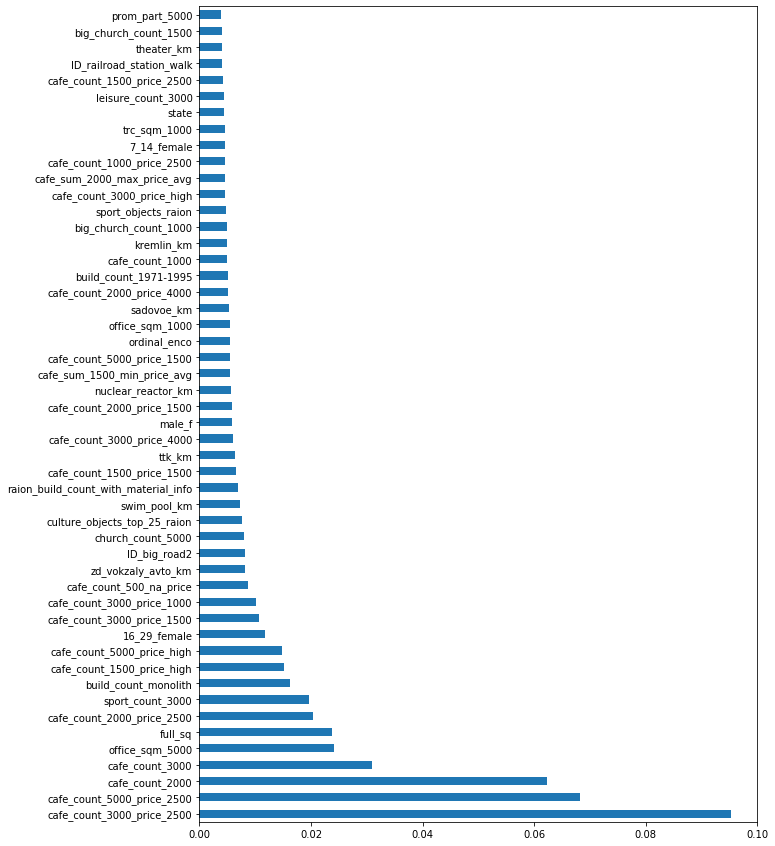

In [131]:

feat_importances = pd.Series(xgb_model.feature_importances_, index=df.columns)
plt.figure(figsize=(10,15))

feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [3]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train_rmsle", "Test_RMSLE", "preprocess"]

x.add_row(["XGB", 0.4260, 0.4119, "Before_filling_with just 0"])
x.add_row(["XGB", 0.4293, 0.4135, "After_filling_with_specific_values"])



print(x)

+-------+-------------+------------+------------------------------------+
| Model | Train_rmsle | Test_RMSLE |             preprocess             |
+-------+-------------+------------+------------------------------------+
|  XGB  |    0.426    |   0.4119   |     Before_filling_with just 0     |
|  XGB  |    0.4293   |   0.4135   | After_filling_with_specific_values |
+-------+-------------+------------+------------------------------------+


In [1362]:
df=tot_encoding(df)

In [1361]:
#mistake of full_sq equal to Life_sq
df.loc[df['full_sq']==df['life_sq'],['life_sq']]=df.loc[df['full_sq']==df['life_sq'],['full_sq']]-df.loc[df['full_sq']==df['life_sq'],['kitch_sq']]

# FEATURE ENGINEERING

In [1363]:
#As the distance increase price also tend to drop in neagtive corelation
#these are highly neagtively correlated
#swim_pool_km
#nuclear_reactor_km
#kremlin_km
#bulvar_ring_km
#sadovoe_km
#ttk_km
#metro_km_avto
df

,Unnamed: 0,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,...,water_1line_enco,railroad_1line_enco,big_road1_1line_enco,thermal_power_plant_raion_enco,incineration_raion_enco,oil_chemistry_raion_enco,radiation_raion_enco,big_market_raion_enco,railroad_terminal_raion_enco,producct_type_enco
0,0,1,2011-08-20,43,27.00,4.0,4.0,0.0,1976.0,2.0,...,0,0,0,0,0,0,0,0,0,2
1,1,2,2011-08-23,34,19.00,3.0,3.0,0.0,2013.5,2.0,...,0,1,0,0,0,0,0,0,0,2
2,2,3,2011-08-27,43,29.00,2.0,2.0,0.0,1969.0,2.0,...,0,0,0,0,0,0,1,0,0,2
3,3,4,2011-09-01,89,50.00,9.0,9.0,0.0,2003.0,2.0,...,0,0,0,0,0,0,0,0,0,2
4,4,5,2011-09-05,77,NaN,4.0,4.0,0.0,1964.0,2.0,...,0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30466,30469,2015-06-30,44,27.00,7.0,9.0,1.0,1975.0,2.0,...,0,0,0,0,1,0,1,0,0,2
30467,30467,30470,2015-06-30,86,59.00,3.0,9.0,2.0,1935.0,4.0,...,0,1,0,0,0,0,1,0,1,2
30468,30468,30471,2015-06-30,45,38.25,10.0,20.0,1.0,2015.0,1.0,...,0,0,0,0,0,0,0,0,0,3
30469,30469,30472,2015-06-30,64,32.00,5.0,15.0,1.0,2003.0,2.0,...,0,0,0,0,0,0,1,0,0,2


In [1364]:
df.drop(columns=["Unnamed: 0"],inplace=True)

## house count for every week in a year

In [1365]:
def add_timely(df):
    df['week_with_year'] = ( pd.to_datetime(df['timestamp']).dt.weekofyear +  pd.to_datetime(df['timestamp']).dt.year * 100)#
    this_weekyear=df['week_with_year'].value_counts().to_dict()
    df['house_count_weekyear']=df['week_with_year'].map(this_weekyear)#
    df['month_bef_timest'] = pd.to_datetime(df['timestamp']).apply(lambda x: x - pd.DateOffset(months=1))
#1 month before time_stamp_wrt_weeks data
    df['month_bef_weekyear']=pd.to_datetime(df['month_bef_timest']).dt.weekofyear +  pd.to_datetime(df['month_bef_timest']).dt.year * 100
    this_weekyear=df['month_bef_weekyear'].value_counts().to_dict()
    df['house_count_mobefweekyear']=df['week_with_year'].map(this_weekyear)
    df['house_count_mobefweekyear'].fillna(0,inplace=True)#
    df['ageofbuild']=pd.to_datetime(df['timestamp']).dt.year-df['build_year']
    return df
#    remov=['week_with_year','month_bef_timest','month_bef_weekyear','timestamp']


In [1366]:
df=add_timely(df)

In [1368]:
def add_popfeat(df):
    df['density_pop']=df['raion_popul']/df['area_m']
    df['density_hospital_bed'] =  df['hospital_beds_raion']/df['raion_popul'] 
    df['density_healthcare_centers'] =   df['healthcare_centers_raion']/df['raion_popul']
    df['density_shopping_centers'] = df['shopping_centers_raion']/df['raion_popul']
    df['density_sport_objects'] =  df['sport_objects_raion']/df['16_29_all'] #no of higher eduction inst_
    df['density_schools']=df['school_quota']/df['children_school']
#children_preschool	Number of pre-school age population
#preschool_quota	Number of seats in pre-school organizations
    df['density_preschools']=df['preschool_quota']/df['children_preschool']
    df['male_ratio']=df['male_f']/df['full_all']
    df['female_ratio']=df['female_f']/df['full_all']
    df['male_fem_rati']=df['male_f']/df['female_f']
    df['young_ratio']=df['young_all']/df['full_all']
    df['work_ratio']=df['work_all']/df['full_all']
    df['ekder_ratio']=df['ekder_all']/df['full_all']

#male_young_work_elder ratios
    df['male_young_ratio']=df['young_male']/df['male_f']
    df['male_work_ratio']=df['work_male']/df['male_f']
    df['male_ekder_ratio']=df['ekder_male']/df['male_f']

    df['female_young_ratio']=df['young_female']/df['female_f']
    df['female_work_ratio']=df['work_female']/df['female_f']
    df['female_ekder_ratio']=df['ekder_female']/df['female_f']

    return df
#remov=["week_with_year","month_bef_timest","month_bef_weekyear","preschool_quota","sport_objects_raion","raion_popul","healthcare_centers_raion","area_m"   ,"16_29_all","shopping_centers_raion","hospital_beds_raion"  ,"young_male", "full_all","female_f","children_preschool"  ,"male_f" ,"young_all"  ,"work_all","ekder_all","work_male" ,"female_f" ,"timestamp","ekder_female","work_female","young_female"]


In [1370]:
df=add_popfeat(df)

In [1371]:
def add_house_st(df):
    df['houst_metrost']=df['ID_metro'].astype(int).astype(str)+df['metro_km_avto'].round(1).astype(str)


    df['house_railst']=df['ID_railroad_station_walk'].astype(int).astype(str)+df['railroad_station_avto_km'].round(1).astype(str)

#bus_terminal_avto_km	Distance to bus terminal (avto)
#ID_bus_terminal	Nearest bus terminal id

    df['house_busst']=df['ID_bus_terminal'].astype(int).astype(str)+df['bus_terminal_avto_km'].round(1).astype(str)

#big_road1_km	Distance to Nearest major road
#ID_big_road1	Nearest big road 

    df['house_bigroadkm']=df['ID_big_road1'].astype(int).astype(str)+df['big_road1_km'].round(1).astype(str)

#big_road2_km	The distance to next distant major road
#ID_big_road2	2nd nearest big road id

    df['house_bigroad2km']=df['ID_big_road2'].astype(int).astype(str)+df['big_road2_km'].round(1).astype(str)
    
    df['houst_metrost']=df['houst_metrost'].astype(float)
    df['house_railst']=df['house_railst'].astype(float)
    df['house_busst']=df['house_busst'].astype(float)
    df['house_bigroadkm']=df['house_bigroadkm'].astype(float)
    df['house_bigroad2km']=df['house_bigroad2km'].astype(float)

    return df
#remov=["week_with_year",'ID_metro','metro_km_avto','ID_railroad_station_walk','ID_big_road2','ID_bus_terminal','big_road1_km','ID_big_road1','big_road2_km','bus_terminal_avto_km','railroad_station_avto_km',"month_bef_timest","month_bef_weekyear","preschool_quota","sport_objects_raion","raion_popul","healthcare_centers_raion","area_m"   ,"16_29_all","shopping_centers_raion","hospital_beds_raion"  ,"young_male", "full_all","female_f","children_preschool"  ,"male_f" ,"young_all"  ,"work_all","ekder_all","work_male" ,"female_f" ,"timestamp","ekder_female","work_female","young_female"]


In [1372]:
df=add_house_st(df)

In [1373]:
#office_count_500	The number of office space in 500 meters zone
#office_sqm_500	The square of office space in 500 meters zone
def ofc_sqm_500_5000(df):
    df['off_500persqm']=df['office_sqm_500']/df['office_count_500']
    df['trc_500persqm'] = df['trc_sqm_500'] / df['trc_count_500']
    df['off_1000persqm'] = df['office_sqm_1000'] / df['office_count_1000']
    df['trc_1000persqm'] = df['trc_sqm_1000'] / df['trc_count_1000']
    df['trc_1500persqm'] = df['trc_sqm_1500'] / df['trc_count_1500']
    df['trc_2000persqm'] = df['trc_sqm_2000']/ df['trc_count_2000']

    df['trc_3000persqm'] = df['trc_sqm_3000']/ df['trc_count_3000']
    df['off_3000persqm'] = df['office_sqm_3000'] / df['office_count_3000']

    df['trc_5000persqm'] = df['trc_sqm_5000']/ df['trc_count_5000']
    df['off_5000persqm'] = df['office_sqm_5000'] / df['office_count_5000']
    return df


In [1374]:
df=ofc_sqm_500_5000(df)

In [1387]:
def remov_uneccfeatures(df,remov_feat):
    for i in remov_feat:
        if i in df.columns:
            df.drop(columns=i,inplace=True)
    return df
    
    

In [1388]:
len(remov)

69

In [1393]:
remov_col=["office_count_1000","office_sqm_1000","office_count_2000","office_sqm_2000","office_count_3000","office_sqm_3000","week_with_year","month_bef_timest","children_preschool","month_bef_weekyear","year","unnamed: 0","raion_popul","male_f","female_f","young_all","young_male","young_female","work_all","work_male","work_female","ekder_all","ekder_male","ekder_female","ID_metro","metro_km_avto","ID_railroad_station_avto","railroad_station_avto_km", "ID_bus_terminal","bus_terminal_avto_km","ID_big_road1","big_road1_km","ID_big_road2","big_road2_km"]
remov=["week_with_year","ID_metro","metro_km_avto","ID_railroad_station_walk","ID_big_road2","ID_bus_terminal","big_road1_km","ID_big_road1","big_road2_km","bus_terminal_avto_km","railroad_station_avto_km","month_bef_timest","month_bef_weekyear","preschool_quota","sport_objects_raion","raion_popul","healthcare_centers_raion","area_m"   ,"16_29_all","shopping_centers_raion","hospital_beds_raion"  ,"young_male", "full_all","female_f","children_preschool"  ,"male_f" ,"young_all"  ,"work_all","ekder_all","work_male" ,"female_f" ,"timestamp","ekder_female","work_female","young_female"]
remov=remov_col+remov

In [1396]:
df=remov_uneccfeatures(df,remov)

In [1399]:
df.shape

(30471, 384)

In [ ]:
full_all	 Total number of population in the municipality
male_f	Male population
female_f	Female population
young_all	Population younger than working age
young_male	Male population younger than working age 
young_female	Feale population younger than working age 
work_all	Working-age population
work_male	Male working-age population
work_female	Female working-age population
elder_all	Population older than  working age
elder_male	Male population older than  working age
elder_female	Female population older than  working age
0_6_all	              Population aged 0-6
0_6_male	Male population aged 0-7
0_6_female	Female population aged 0-8
7_14_all	Population aged  7-14
7_14_male	Male population aged 7-14
7_14_female	Female population aged 7-14
0_17_all	Population aged 0-17
0_17_male	Male population aged 0-17
0_17_female	Female population aged 0-17
16_29_all	Population aged 16-19
16_29_male	Male population aged 16-19
16_29_female	Female population aged 16-19
0_13_all	Population aged 0-13
0_13_male	Male population aged 0-13
0_13_female	Female population aged 0-13


In [ ]:
metro_min_avto	Time to subway by car, min.
metro_km_avto	Distance to subway by car, km
metro_min_walk	Time to metro by foot
metro_km_walk	Distance to the metro, km
kindergarten_km	Distance to kindergarten
school_km	            Distance to high school 
park_km	              Distance to park
green_zone_km	Distance to green zone
industrial_zone_km	Distance to industrial zone
water_treatment_km	Distance to water treatment
cemetery_km	            Distance to the cemetery
incineration_km	Distance to the incineration (waste treatment process neary by)
railroad_station_walk_km	Distance to the railroad station (walk)
railroad_station_walk_min	Time to the railroad station (walk)
ID_railroad_station_walk	Nearest railroad station id 
railroad_station_avto_km	Distance to the railroad station (avto)
railroad_station_avto_min	Time to the railroad station (avto)
ID_railroad_station_avto	Nearest railroad station id (avto)
public_transport_station_km	Distance to the public transport station (walk)
public_transport_station_min_walk	Time to the public transport station (walk)
water_km	Distance to the water reservoir / river
water_1line	First line to the river (150 m)
mkad_km	Distance to MKAD (Moscow Circle Auto Road)
ttk_km	           Distance to the TTC (Third Transport Ring)
sadovoe_km	Distance to the Garden Ring
bulvar_ring_km	 The distance to the Boulevard Ring
kremlin_km	Distance to the city center (Kremlin)
big_road1_km	Distance to Nearest major road
ID_big_road1	Nearest big road 
big_road1_1line	First line to the road (100 m for highwys, 250 m to MKAD)
big_road2_km	The distance to next distant major road
ID_big_road2	2nd nearest big road id
railroad_km	Distance to the railway / Moscow Central Ring / open areas Underground
railroad_1line	First line to the railway (100 m)
zd_vokzaly_avto_km	Distance to train station
ID_railroad_terminal	Nearest railroad terminal id
bus_terminal_avto_km	Distance to bus terminal (avto)
ID_bus_terminal	Nearest bus terminal id
oil_chemistry_km	Distance to dirty industries
nuclear_reactor_km	Distance to nuclear reactor
radiation_km	              Distance to burial of radioactive waste
power_transmission_line_km	Distance to power transmission line
thermal_power_plant_km	Distance to thermal power plant
ts_km	          Distance to power station
big_market_km	   Distance to grocery / wholesale markets
market_shop_km	Distance to markets and department stores
fitness_km	Distance to fitness
swim_pool_km	Distance to swimming pool
ice_rink_km	Distance to ice palace
stadium_km	Distance to stadium
basketball_km	Distance to the basketball courts
hospice_morgue_km	Distance to hospice/morgue
detention_facility_km	Distance to detention facility
public_healthcare_km	Distance to public healthcare
university_km	Distance to universities
workplaces_km	Distance to workplaces
shopping_centers_km	Distance to shopping centers
office_km	Distance to business centers/ offices
additional_education_km	Distance to additional education
preschool_km	Distance to preschool education organizations
big_church_km	Distance to large church
church_synagogue_km	Distance to Christian chirches and Synagogues
mosque_km	Distance to mosques
theater_km	Distance to theater
museum_km	Distance to museums
exhibition_km	Distance to exhibition
catering_km	Distance to catering

In [1401]:
df['off_500persqm'].fillna(0,inplace=True)
df['trc_500persqm'].fillna(0,inplace=True)
df['off_1000persqm'].fillna(0,inplace=True)
df['off_3000persqm'].fillna(0,inplace=True)
df['off_5000persqm'].fillna(0,inplace=True)
df['trc_5000persqm'].fillna(0,inplace=True)

df['trc_1500persqm'].fillna(0,inplace=True)
df['trc_3000persqm'].fillna(0,inplace=True)
df['trc_2000persqm'].fillna(0,inplace=True)
df['trc_1000persqm'].fillna(0,inplace=True)


In [1402]:
df.shape

(30471, 384)

In [710]:
df.to_csv('df_fe.csv')

In [847]:
df=pd.read_csv("df_fe.csv")

In [714]:
df.drop(columns='Unnamed: 0',inplace=True)

In [994]:
df

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,off_500persqm,trc_500persqm,off_1000persqm,trc_1000persqm,trc_1500persqm,trc_2000persqm,trc_3000persqm,off_3000persqm,trc_5000persqm,off_5000persqm
0,1,43,27.00,4.0,4.0,0.0,1976.0,2.0,8.0,0.0,...,0.000000,0.0,30500.000000,18533.333333,19046.666667,65520.578947,61704.521739,20962.833333,77627.230769,27840.862069
1,2,34,19.00,3.0,3.0,0.0,2013.5,2.0,6.0,0.0,...,0.000000,0.0,43300.000000,18813.000000,18152.142857,22383.125000,35111.785714,68498.833333,50873.550000,40764.621212
2,3,43,29.00,2.0,2.0,0.0,1969.0,2.0,5.0,0.0,...,0.000000,0.0,0.000000,0.000000,2600.000000,7507.142857,7507.142857,13857.000000,44942.571429,34375.813953
3,4,89,50.00,9.0,9.0,0.0,2003.0,2.0,8.0,0.0,...,0.000000,0.0,11000.000000,13463.333333,12784.571429,12784.571429,17146.333333,41750.000000,42826.363636,30520.750000
4,5,77,31.00,4.0,4.0,0.0,1964.0,2.0,7.0,0.0,...,19579.933333,45000.0,9151.130435,52733.333333,49544.444444,33226.058824,38281.166667,11216.088525,30728.578947,12198.293179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.00,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,0.000000,20985.0,0.000000,26656.666667,18205.000000,25554.071429,33869.545455,24128.411765,48080.981132,19059.113636
30467,30470,86,59.00,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,28069.428571,0.0,20419.428571,17818.000000,17298.571429,14507.700000,30191.857143,14076.682274,48287.944444,16126.163695
30468,30471,45,38.25,10.0,20.0,1.0,2015.0,1.0,1.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.000000,11000.000000,11000.000000,0.000000,50325.000000,117300.000000
30469,30472,64,32.00,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,0.000000,0.0,0.000000,0.000000,28800.000000,13629.600000,19254.000000,31544.533333,32544.911111,31428.512821


In [1403]:
far_away_build=["industrial_km","hospice_morgue_km","water_treatment_km","cemetery_km","incineration_km","oil_chemistry_km","nuclear_reactor_km","radiation_km","power_transmission_line_km","thermal_power_plant_km","ts_km"]

city_attractions=["kindergarten_km","school_km","park_km","green_zone_km","public_transport_station_km","public_transport_station_min_walk","water_km","mkad_km","ttk_km","sadovoe_km","bulvar_ring_km","kremlin_km","zd_vokzaly_avto_km","big_market_km","market_shop_km","fitness_km","swim_pool_km","ice_rink_km","stadium_km","basketball_km","detention_facility_km","public_healthcare_km","university_km","workplaces_km","shopping_centers_km","office_km","additional_education_km","preschool_km","big_church_km","church_synagogue_km","mosque_km","theater_km","museum_km","exhibition_km","catering_km"]


In [ ]:
rem_col=['green_part_500','prom_part_500',"office_count_500","trc_count_500","big_church_count_5000","church_count_5000","mosque_count_5000","leisure_count_5000","sport_count_5000","market_count_5000"]


In [1404]:
df['COA_mean']=df[city_attractions].mean(axis=1)
df['far_away_build_mean']=df[far_away_build].mean(axis=1)


In [1405]:
df.drop(columns=far_away_build,inplace=True)
df.drop(columns=city_attractions,inplace=True)



In [998]:
for i in (df.columns):
    print(i)

id
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
green_zone_part
indust_part
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
university_top_20_raion
additional_education_raion
culture_objects_top_25_raion
office_raion
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_material_info
build_count_block
build_count_wood
build_count_frame
build_count_brick
build_count_monolith
build_count_panel
build_count_foam
build_count_slag
build_count_mix
raion_build_count_with_builddate_info
build_count_before_1920
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
metro_min_avto
metro_min_walk
metro_km_walk
railroad_station_walk_km
railroad_station_walk_min
railroad_station_avto_min
railroad_km
green_part_500
prom_part_500
office_count_

In [1406]:
df.columns.get_loc("cafe_count_5000_price_high")

183

In [1407]:
rem=df.iloc[:,64:184].columns

In [1408]:
rem

Index(['cafe_count_500', 'cafe_sum_500_min_price_avg',
       'cafe_sum_500_max_price_avg', 'cafe_avg_price_500',
       'cafe_count_500_na_price', 'cafe_count_500_price_500',
       'cafe_count_500_price_1000', 'cafe_count_500_price_1500',
       'cafe_count_500_price_2500', 'cafe_count_500_price_4000',
       ...
       'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000', 'cafe_count_5000_na_price',
       'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high'],
      dtype='object', length=120)

In [1409]:
from sklearn.decomposition import PCA
pca = PCA()
df_new=pca.fit_transform(df.iloc[:,52:162])
df_new.shape

(30471, 110)

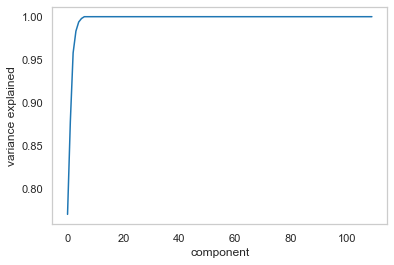

In [1410]:
import seaborn as sns
np.sum(pca.explained_variance_)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cum_var_explained )
plt.grid()
#plt.xticks(np.arange(0, 4, step=1))

plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()

In [1411]:
df_new=pd.DataFrame(df_new)
df_new.loc[:,0:4]

,0,1,2,3,4
0,1.151637e+06,-6.176742e+05,180957.279024,518078.687231,-176363.081523
1,1.362224e+04,-5.427435e+04,-13848.858982,-48787.913103,2716.856647
2,-4.581935e+05,4.945695e+04,33410.378147,30597.858588,-15883.282865
3,-2.853675e+05,8.837375e+03,64959.842637,-42029.852625,-975.040555
4,2.048139e+06,1.086705e+04,-776588.799781,-196350.763825,105192.121549
...,...,...,...,...,...
30466,3.183651e+05,-9.685896e+04,-79121.972298,37701.356573,-57043.813440
30467,9.101788e+05,1.201719e+06,-889885.502343,26454.337702,8515.443452
30468,-4.950020e+05,6.568354e+04,28962.857201,15990.483080,-11201.655185
30469,-8.087275e+04,-1.336562e+05,-91377.165040,-7802.920630,-11869.648498


In [1413]:
df.columns.get_loc('caft_trc_pc1')

340

In [1414]:
rem

Index(['cafe_count_500', 'cafe_sum_500_min_price_avg',
       'cafe_sum_500_max_price_avg', 'cafe_avg_price_500',
       'cafe_count_500_na_price', 'cafe_count_500_price_500',
       'cafe_count_500_price_1000', 'cafe_count_500_price_1500',
       'cafe_count_500_price_2500', 'cafe_count_500_price_4000',
       ...
       'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000', 'cafe_count_5000_na_price',
       'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high'],
      dtype='object', length=120)

In [1415]:
df.drop(columns=rem,inplace=True)

In [ ]:
raion_build_count_with_material_info	Number of building with material info in district
build_count_block	Share of block buildings
build_count_wood	Share of wood buildings
build_count_frame	Share of frame buildings
build_count_brick	Share of brick buildings
build_count_monolith	Share of monolith buildings
build_count_panel	Share of panel buildings
build_count_foam	Share of foam buildings
build_count_slag	Share of slag buildings
build_count_mix	Share of mixed buildings
Raion_build_count_with_builddate_info  	Number of building with build year info in district
build_count_before_1920	Share of before_1920 buildings
build_count_1921-1945	Share of 1921-1945 buildings
build_count_1946-1970	Share of 1946-1970 buildings
build_count_1971-1995	Share of 1971-1995 buildings
build_count_after_1995	Share of after_1995 buildings

In [1416]:
df.columns.get_loc('raion_build_count_with_material_info')

35

In [1417]:
df.iloc[:,35:51]

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995
0,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,211.0,0.0,0.0,0.0,206.0,5.0
1,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,0.0,244.0,1.0,1.0,143.0,84.0,15.0
2,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,1.0,0.0,330.0,1.0,0.0,246.0,63.0,20.0
3,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,9.0,2.0,459.0,13.0,24.0,40.0,130.0,252.0
4,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,3.0,1.0,746.0,371.0,114.0,146.0,62.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,282.0,35.0,0.0,0.0,20.0,5.0,222.0,0.0,0.0,0.0,282.0,0.0,0.0,14.0,246.0,22.0
30467,651.0,19.0,27.0,4.0,529.0,25.0,41.0,0.0,5.0,1.0,650.0,263.0,105.0,154.0,71.0,57.0
30468,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30469,185.0,38.0,0.0,0.0,4.0,9.0,134.0,0.0,0.0,0.0,186.0,0.0,0.0,84.0,36.0,66.0


In [1418]:
from sklearn.decomposition import PCA
pca = PCA()
df_new=pca.fit_transform(df.iloc[:,35:51])
df_new.shape

(30471, 16)

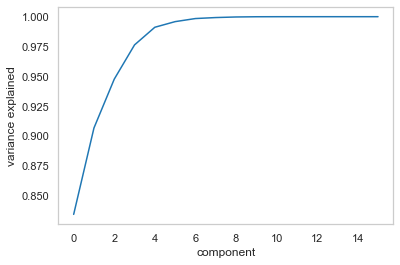

In [1419]:
import seaborn as sns
np.sum(pca.explained_variance_)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cum_var_explained )
plt.grid()
#plt.xticks(np.arange(0, 4, step=1))

plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()

In [1420]:
df_new=pd.DataFrame(df_new)
df_new.iloc[:,0:5]

,0,1,2,3,4
0,-123.744097,-124.788929,-76.425997,-120.468773,104.964225
1,-50.800979,14.771777,-60.860079,21.979839,15.297833
2,99.097185,152.940538,-56.213930,40.932377,-13.268269
3,279.943234,-134.599801,4.411608,-165.266120,-92.701689
4,718.569837,472.745438,204.332591,-303.901814,30.488069
...,...,...,...,...,...
30466,-16.185905,-132.157608,-110.807236,-153.348245,116.256161
30467,577.948664,363.396328,168.033810,-222.544824,25.387162
30468,-427.189995,-28.641246,80.460150,29.188259,-20.651908
30469,-140.176406,-75.595432,-35.016907,3.011923,-33.033287


In [1421]:
df['count_comp1']=df_new.iloc[:,0]
df['count_comp2']=df_new.iloc[:,1]
df['count_comp3']=df_new.iloc[:,2]
df['count_comp4']=df_new.iloc[:,3]


In [1422]:
df.iloc[:,210:215].isna().sum()

off_1000persqm    0
trc_1000persqm    0
trc_1500persqm    0
trc_2000persqm    0
trc_3000persqm    0
dtype: int64

In [1423]:
rem_unpca=df.iloc[:,35:51].columns
df.drop(columns=rem_unpca,inplace=True)

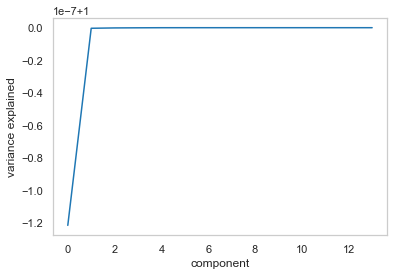

,0,1,2
0,-1.273035e+06,3868.320628,-15.695190
1,-1.123035e+06,3872.601413,-29.017090
2,-1.423035e+06,3864.108940,-29.399932
3,5.976965e+06,4073.247547,-0.076663
4,9.208417e+06,4164.673613,-7.441283
...,...,...,...
30466,2.769647e+05,13.209536,-32.010439
30467,1.787696e+07,510.932058,12.785724
30468,-1.520763e+05,1.031778,-19.129165
30469,6.376965e+06,185.619569,17.017877


In [1589]:






rem=df.iloc[:,20:34].columns
#df.drop(columns=rem,inplace=True)


from sklearn.decomposition import PCA
pca = PCA()
df_new1=pca.fit_transform(df.iloc[:,20:34])
df_new1.shape

import seaborn as sns
np.sum(pca.explained_variance_)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cum_var_explained )
plt.grid()
#plt.xticks(np.arange(0, 4, step=1))

plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()

df_new1=pd.DataFrame(df_new1)
df_new1.iloc[:,0:3]



df['peopl_comp1']=df_new1.loc[:,0]
df['peopl_comp2']=df_new1.loc[:,1]
df['peopl_comp3']=df_new1.loc[:,2]



In [1429]:
remov_feat= ["culture_objects_top_25_raion", "oil_chemistry_raion", "railroad_terminal_raion", "nuclear_reactor_raion",
"build_count_foam", "big_road1_1line", "railroad_1line", "office_sqm_500", "trc_sqm_500",
"cafe_count_500_price_4000", "cafe_count_500_price_high", "mosque_count_500", "leisure_count_500",
"office_sqm_1000", "trc_sqm_1000", "cafe_count_1000_price_high", "mosque_count_1000", "cafe_count_1500_price_high",
"mosque_count_1500", "cafe_count_2000_price_high"]


In [1460]:
df=remov_uneccfeatures(df,['sub_area'])

In [1479]:
df0=df.loc[df['price_doc']>=1000000].loc[df['price_doc']<=24606918]
#df=df.loc[df['producct_type_enco']==2]

target=df0['price_doc']
#df.drop(columns='price_doc',inplace=True)

df_train=df0.drop(columns=['price_doc'])[:24500]
y_train=target[:24500]
df_test=df0.drop(columns=['price_doc'])[24500:]
y_test=target[24500:]

In [1489]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate = 0.06, max_depth=8, n_estimators=300,eval_metric='rmsle')
xgb_model.fit(df_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.06, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1490]:
print("TRAIN RMSLE")
predictions=xgb_model.predict(df_train)

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, predictions))

TRAIN RMSLE


0.3085945992638498

In [1491]:

#RMSE

print("test RMSLE")
predictions=xgb_model.predict(df_test)
#RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, predictions))

test RMSLE


0.39726964476358373

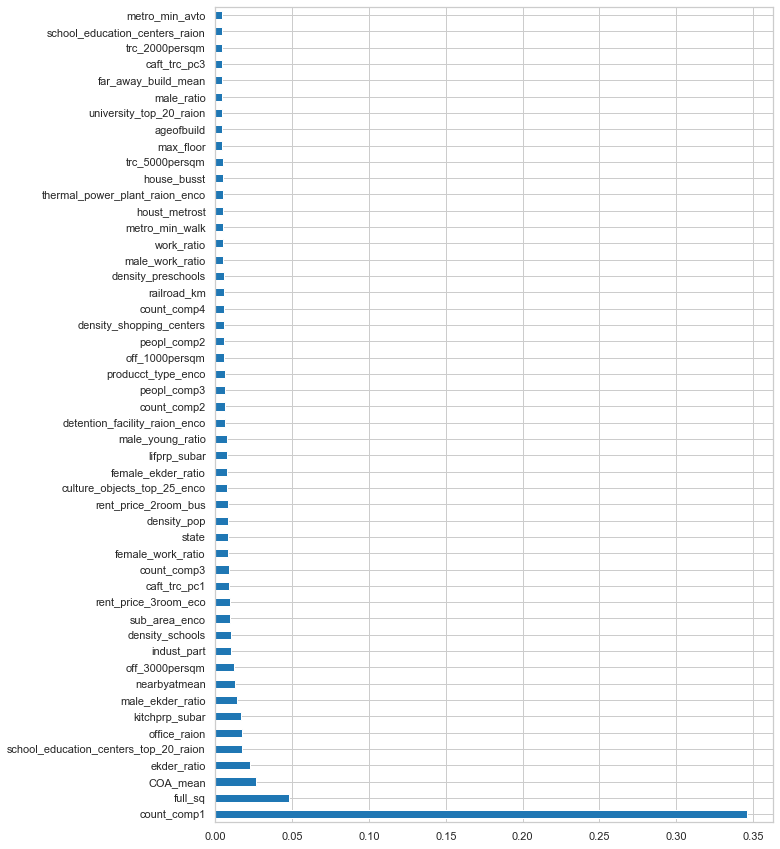

In [1488]:

feat_importances = pd.Series(xgb_model.feature_importances_, index=df_train.columns)
plt.figure(figsize=(10,15))

feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [1340]:
df=df.loc[df['price_doc']>=1000000].loc[df['price_doc']<=24606918]
#df=df.loc[df['producct_type_enco']==2]

target=df['price_doc']
#df.drop(columns='price_doc',inplace=True)

df_train=df.drop(columns=['price_doc'])[:27500]
y_train=target[:27500]
df_test=df.drop(columns=['price_doc'])[27500:]
y_test=target[27500:]

In [1341]:
df_test.shape

(2434, 188)

In [1342]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate = 0.04, max_depth=8, n_estimators=180,eval_metric='rmsle')
xgb_model.fit(df_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.04, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1343]:
print("TRAIN RMSLE")
predictions=xgb_model.predict(df_train)

from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_train, predictions))

TRAIN RMSLE


0.3610733018612218

In [1344]:

#RMSE

print("test RMSLE")
predictions=xgb_model.predict(df_test)
#RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, predictions))

test RMSLE


0.37241649539720123

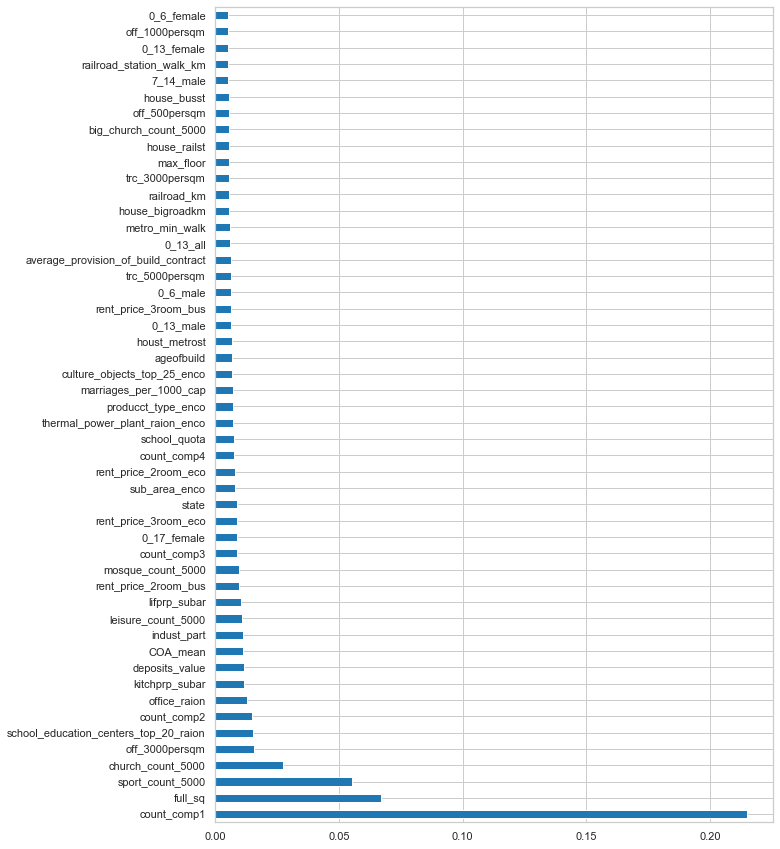

In [1353]:

feat_importances = pd.Series(xgb_model.feature_importances_, index=df_train.columns)
plt.figure(figsize=(10,15))

feat_importances.nlargest(50).plot(kind='barh')
plt.show()

In [750]:
c=df.iloc[:,20].columns
df.drop(columns=c,inplace=True)

In [ ]:
df.drop(columns=['cafe_count_3000_price_2500'],inplace=True)

In [ ]:
# we have 15 categories features
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

In [502]:

cat_feat=dtype_df[(dtype_df['Column Type'])=='object']['Count']

In [503]:
for col in df[cat_feat]:
    print(col,"               ",len(df[col].unique()),"labels")

house_statkm                 3438 labels


In [741]:
df.drop(columns='house_statkm',inplace=True)

In [1538]:
df['build_year']

0        1976.0
1        2013.5
2        1969.0
3        2003.0
4        1964.0
          ...  
30466    1975.0
30467    1935.0
30468    2015.0
30469    2003.0
30470    1968.0
Name: build_year, Length: 30471, dtype: float64

In [1548]:
full_sq_floor=df.groupby('floor')['full_sq'].aggregate(np.median).to_dict()
full_sq_numroom=df.groupby('num_room')['full_sq'].aggregate(np.median).to_dict()
full_sq_buildyear=df.groupby('build_year')['full_sq'].aggregate(np.median).to_dict()
full_sq_sub_area=df.groupby('sub_area_enco')['full_sq'].aggregate(np.median).to_dict()




In [1549]:
full_sq_sub_area

{0.00684931506849315: 45.5,
 0.0136986301369863: 68.0,
 0.02054794520547945: 72.0,
 0.0410958904109589: 45.0,
 0.04794520547945205: 40.5,
 0.10273972602739725: 47.0,
 0.13013698630136986: 46.0,
 0.136986301369863: 49.0,
 0.18493150684931506: 61.0,
 0.21232876712328766: 134.0,
 0.2328767123287671: 67.0,
 0.2534246575342466: 53.0,
 0.3013698630136986: 44.5,
 0.3356164383561644: 45.0,
 0.3424657534246575: 57.5,
 0.3835616438356164: 54.5,
 0.3972602739726027: 41.0,
 0.410958904109589: 55.0,
 0.4246575342465753: 96.0,
 0.4383561643835616: 44.0,
 0.4657534246575342: 44.0,
 0.4931506849315068: 56.0,
 0.5273972602739726: 41.0,
 0.541095890410959: 48.0,
 0.5547945205479452: 60.0,
 0.5821917808219178: 43.0,
 0.6164383561643836: 62.5,
 0.6301369863013698: 50.0,
 0.6438356164383562: 48.0,
 0.6712328767123288: 53.5,
 0.678082191780822: 51.0,
 0.684931506849315: 52.0,
 0.6917808219178082: 46.0,
 0.7054794520547946: 57.0,
 0.7191780821917808: 47.0,
 0.7602739726027398: 48.0,
 0.7876712328767124: 44.0

In [1550]:
full_sq_floor=df.groupby('floor')['full_sq'].aggregate(np.median).to_dict()
full_sq_numroom=df.groupby('num_room')['full_sq'].aggregate(np.median).to_dict()
full_sq_buildyear=df.groupby('build_year')['full_sq'].aggregate(np.median).to_dict()
full_sq_sub_area=df.groupby('sub_area_enco')['full_sq'].aggregate(np.median).to_dict()
df['full_sq_floor']=df['floor'].map(full_sq_floor)
df['full_sq_numroom']=df['num_room'].map(full_sq_floor)
df['full_sq_buildyear']=df['build_year'].map(full_sq_floor)
df['full_sq_sub_area']=df['sub_area_enco'].map(full_sq_floor)
df['extra_sq']=df.full_sq-df.life_sq-df.kitch_sq
df.drop(columns='full_sq',inplace=True)
df.drop(columns='full_sq',inplace=True)

In [1517]:
df['extra_sq']=df.full_sq-df.life_sq-df.kitch_sq

In [1551]:
df.drop(columns='full_sq',inplace=True)

In [1559]:
for i in range(0,10,1):
    var =df1["price_doc"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,(var[int(len(var)*(float(i)/100))])))
print ("10 percentile value is ",(var[-1]))

0 percentile value is 1000000
1 percentile value is 1000000
2 percentile value is 1000000
3 percentile value is 1000000
4 percentile value is 1050000
5 percentile value is 1500000
6 percentile value is 2000000
7 percentile value is 2000000
8 percentile value is 2000000
9 percentile value is 2000000
10 percentile value is  24500000


In [119]:
df=final_df

In [131]:
#many members of investment have recorded low prices comparatively to restrain from taxes. So it is better to drop those prices

df0=df.loc[df['price_doc']>=1000000].loc[df['price_doc']<=24606918]

df1=df0.loc[df['producct_type_enco']==2]

target=df1['price_doc']
#df.drop(columns='price_doc',inplace=True)


df_train=df1.drop(columns=['price_doc'])[:15500]
y_train=target[:15500]
df_test=df1.drop(columns=['price_doc'])[15500:]
y_test=target[15500:]